![example](images/43222211_s.jpg)

Copyright: <a href='https://www.123rf.com/profile_jagcz'>Jakub Gojda</a>

# How a company squeezes into "making movie business" and gets successful

<span style="color:red; font-size:1.5em">**Phase 1 Final Project**</span><br>
**Authors:** Elena Kazakova<br>
**Cohort:** DS02222021<br>
**Instructor:** James Irving
***

## Overview

This project analyzes the three publically avalable online databases, IMDb, TN and BOM. IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online. The Numbers (TN) is a film industry data website that tracks box office revenue in a systematic, algorithmic way.Box Office Mojo (BOM) is an American website that tracks box-office revenue in a systematic, algorithmic way. Exploratory and descriptive analysis suggests that a company looking into joining lucrative movie business needs to partner with the studios producing the highest ROIs, look into investing into making movies in Horror, Mystery and Thriller genres and carefully plan the release date of their products.

## Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about producing movies. They need recommendations on how to minimize the risk to their investment and maximize the profitability of their future products. Though the scope of this project is limited and further in-depth analysis should be considered, the results of the analysis reveals several valuable recommendations. <br>

***

## Data Understanding

As pointed in the overview section, the project uses the data from three databases already available as zipped csv files imported from  IMDb, TN, and BOM databases. Additional data from Rotten Tomatoes (RT) and The Movie Database (TMdb) were explored and initially considered, and it has been decided not to use this information in the analysis performed. This data might be considered for future exploration. An analysis of the content in all the sources available was performed to aid in making this decision. The data diagram of all the tables was created, and only tables with movie financial and most easily joined tables have been chosen for further analysis. The rest of the tables should be considered for performing analysis of ratings and professional staff performance. Another consideration for the data sources' choice was the number of movie records available in each of the tables. Please see below the description and the results of data sources analysis.

***

In [1]:
# Import standard packages to be used in the process, it essential to run methods associated with all the packages
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import shutil
import os
import sqlite3
from sqlite3 import Error
import csv
import io
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


%matplotlib inline

In [1]:
#!rm data/sqlite/db/movies.db

### Unzipping the source csv and tsv files and converting them into movies.db tables

In [3]:
# This function might not be needed but is left here just in case I need and might be removed later

def insert_nulls(table_name):
    q1 = 'SELECT * FROM '+ table_name+''
    df = pd.DataFrame(cur.execute(q1))
    df.columns = [x[0] for x in cur.description]
    column_names=list(df.columns)

# dictReader reads empty values as '', they need to be replaced with Nulls in all fields similar to the statement below
    for i in column_names:
        q2='UPDATE '+table_name+' SET '+i+' =NULL WHERE '+i+'=""'
        cur.execute(q2)
    return

In [4]:
# This function is needed to easily display the dataframe from a table with all the columns names

def display_tableDF(table_name):
    q1 = 'SELECT * FROM '+ table_name+''
    df = pd.DataFrame(cur.execute(q1))
    df.columns = [x[0] for x in cur.description]
    return df

In [5]:
# This function is needed to easily display the dataframe from a csv file with all the columns names

def display_csvfileDF(file_name):
    df = pd.read_csv('data/unzippedData/'+file_name, header=0, encoding='UTF-8')
    return df

In [6]:
# This function is needed to easily display the dataframe from a tsv file with all the columns names
def display_tsvfileDF(file_name):
    df = pd.read_csv('data/unzippedData/'+file_name, sep = '\t', header=0, encoding='latin1')
    return df

In [7]:
def table_query(q):
    df = pd.DataFrame(cur.execute(q))
    df.columns = [x[0] for x in cur.description]
    return df

#### Unzipping the files

In [8]:
# Testing unzipping the gz file

# The first step to unzip the files provided is to create a separate directory for unzipped csv files through bash terminal
# the address is  ~/Documents/Flatiron/Phase1/Project/dsc-project-template/data/unzippedData

with gzip.open('data/zippedData/bom.movie_gross.csv.gz') as f:
            bom_movie_gross = pd.read_csv(f)
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
#Testing Saving the file above as an csv file to a directory where unzipped files will live, testing

with gzip.open('data/zippedData/bom.movie_gross.csv.gz', 'rb') as f_out:
    with open('data/unzippedData/bom.movie_gross.csv', 'wb') as f_in:
        shutil.copyfileobj(f_out, f_in)

In [10]:
# Creating a list of file names to loop throught unzipping; 

# Unzipping the files in the list of gz files 

file_list_to_unzip_raw = ['bom.movie_gross.csv.gz', 'imdb.name.basics.csv.gz', 'imdb.title.akas.csv.gz', 
                          'imdb.title.basics.csv.gz', 'imdb.title.crew.csv.gz', 'imdb.title.principals.csv.gz',
                          'imdb.title.ratings.csv.gz', 'rt.movie_info.tsv.gz', 'rt.reviews.tsv.gz',
                          'tmdb.movies.csv.gz', 'tn.movie_budgets.csv.gz']
addition_path_from = 'data/zippedData/'
addition_path_to = 'data/unzippedData/'
for file in file_list_to_unzip_raw:
    with gzip.open(addition_path_from + file, 'rb') as f_out:
        with open(addition_path_to + file[0:-3], 'wb') as f_in:
            shutil.copyfileobj(f_out, f_in)

In [11]:
# Checking the content of the data/zippedData directory

!ls -l data/zippedData/

total 45716
-rw-r--r-- 1 elena 197121    53544 Mar 13 22:49 bom.movie_gross.csv.gz
-rw-r--r-- 1 elena 197121 18070960 Mar 13 22:49 imdb.name.basics.csv.gz
-rw-r--r-- 1 elena 197121  5599979 Mar 13 22:49 imdb.title.akas.csv.gz
-rw-r--r-- 1 elena 197121  3459897 Mar 13 22:49 imdb.title.basics.csv.gz
-rw-r--r-- 1 elena 197121  1898523 Mar 13 22:49 imdb.title.crew.csv.gz
-rw-r--r-- 1 elena 197121 12287583 Mar 13 22:49 imdb.title.principals.csv.gz
-rw-r--r-- 1 elena 197121   539530 Mar 13 22:49 imdb.title.ratings.csv.gz
-rw-r--r-- 1 elena 197121   498202 Mar 13 22:49 rt.movie_info.tsv.gz
-rw-r--r-- 1 elena 197121  3402194 Mar 13 22:49 rt.reviews.tsv.gz
-rw-r--r-- 1 elena 197121   827840 Mar 13 22:49 tmdb.movies.csv.gz
-rw-r--r-- 1 elena 197121   153218 Mar 13 22:49 tn.movie_budgets.csv.gz


In [12]:
# Checking if all the files have been unzipped

!ls -l data/unzippedData/

total 147828
-rw-r--r-- 1 elena 197121   142555 Mar 28 17:25 bom.movie_gross.csv
-rw-r--r-- 1 elena 197121 48926352 Mar 28 17:25 imdb.name.basics.csv
-rw-r--r-- 1 elena 197121 18945529 Mar 28 17:25 imdb.title.akas.csv
-rw-r--r-- 1 elena 197121 11852240 Mar 28 17:25 imdb.title.basics.csv
-rw-r--r-- 1 elena 197121  5728745 Mar 28 17:25 imdb.title.crew.csv
-rw-r--r-- 1 elena 197121 50505795 Mar 28 17:25 imdb.title.principals.csv
-rw-r--r-- 1 elena 197121  1950137 Mar 28 17:25 imdb.title.ratings.csv
-rw-r--r-- 1 elena 197121  1184685 Mar 28 17:25 rt.movie_info.tsv
-rw-r--r-- 1 elena 197121  9395716 Mar 28 17:25 rt.reviews.tsv
-rw-r--r-- 1 elena 197121  2301228 Mar 28 17:25 tmdb.movies.csv
-rw-r--r-- 1 elena 197121   422521 Mar 28 17:25 tn.movie_budgets.csv


<div class="alert alert-block alert-success">
**Result: All the files unzipped correctly**
    </div>

#### Tesing converting the unzipped files to DataFrames

In [13]:
#Testing conversion of an unzipped tsv file into a DataFrame and printing info along with a head of a DF

rt_movie_info = pd.read_csv('data/unzippedData/rt.reviews.tsv', sep = '\t', header=0, encoding='latin1')
print(rt_movie_info.info())
rt_movie_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [14]:
#Testing conversion of an unzipped csv file into a DataFrame and printing info along with a head of a DF

imdb_name_basics = pd.read_csv('data/unzippedData/imdb.name.basics.csv', header=0, encoding='UTF-8')
print(imdb_name_basics.info())
imdb_name_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


#### Creating DataFrames out of all unzipped files and displaying all DF info for each

In [15]:
#Leaving this code for now, most probably needs to be removed

#listing the files in the unzipped directory to make a list with path defined out of these files
list_unzipped_files = os.listdir('data/unzippedData')
list_unzipped_files

['bom.movie_gross.csv',
 'imdb.name.basics.csv',
 'imdb.title.akas.csv',
 'imdb.title.basics.csv',
 'imdb.title.crew.csv',
 'imdb.title.principals.csv',
 'imdb.title.ratings.csv',
 'rt.movie_info.tsv',
 'rt.reviews.tsv',
 'tmdb.movies.csv',
 'tn.movie_budgets.csv']

In [16]:
list_csv_files=[]
list_tsv_files=[]

for i in list_unzipped_files:
    if i[-3:]=='csv':
        list_csv_files.append(i)
    else:
        list_tsv_files.append(i)
print(list_csv_files)
print(list_tsv_files)

['bom.movie_gross.csv', 'imdb.name.basics.csv', 'imdb.title.akas.csv', 'imdb.title.basics.csv', 'imdb.title.crew.csv', 'imdb.title.principals.csv', 'imdb.title.ratings.csv', 'tmdb.movies.csv', 'tn.movie_budgets.csv']
['rt.movie_info.tsv', 'rt.reviews.tsv']


In [17]:
#Creating an empty sqlite3 movies database. The directory sqlite within data directory.
#sqlite directory was created in bash terminal by mkdir data/sqlite/db

conn = sqlite3.connect('data/sqlite/db/movies.db')
cur = conn.cursor() 

In [18]:
# Checking if the database has no tables

cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""").fetchall()

[]

#### Displaying files info in order to create a data diagram

In [19]:
for i in list_tsv_files:
    print(i)
    display_tsvfileDF(i).info()
    print('**********************************************************')

rt.movie_info.tsv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
**********************************************************
rt.reviews.tsv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------ 

In [20]:
for i in list_csv_files:
    print(i)
    display_csvfileDF(i).info()
    print('**********************************************************')

bom.movie_gross.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
**********************************************************
imdb.name.basics.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   

#### The following future database tables diagram was created in LucidChart:

![example](images/Movies_db_transparent.png)

### Analysis of the diagram
*** 
* Based on the diagram above, the tables highlighted in yellow provide basic movie information and financial information, and information that can be used easily by joining them using the title fields in each table.
* The tables imdb_title_basics contains additional details on runtime of a movie and its' genres
* The table tn_movie_budgets table has production budget information along with domestic and worldwide gross income
* The table bom_movie_gross table has domestic and worldwide gross income information along with data on the production studios
***

In [21]:
# Testing generation of a list of table names out of a list of filenames to import into a database
# by replacing '.' with '_'# creating a function
list_table_names=[]
for i in list_unzipped_files:
    if i[-3:]=='csv':
        list_table_names.append(i.replace('.','_').replace('_csv',''))
    else:
        list_table_names.append(i.replace('.','_').replace('_tsv',''))
list_table_names

['bom_movie_gross',
 'imdb_name_basics',
 'imdb_title_akas',
 'imdb_title_basics',
 'imdb_title_crew',
 'imdb_title_principals',
 'imdb_title_ratings',
 'rt_movie_info',
 'rt_reviews',
 'tmdb_movies',
 'tn_movie_budgets']

In [22]:
list_unzipped_files

['bom.movie_gross.csv',
 'imdb.name.basics.csv',
 'imdb.title.akas.csv',
 'imdb.title.basics.csv',
 'imdb.title.crew.csv',
 'imdb.title.principals.csv',
 'imdb.title.ratings.csv',
 'rt.movie_info.tsv',
 'rt.reviews.tsv',
 'tmdb.movies.csv',
 'tn.movie_budgets.csv']

In [23]:
#Creating file names/table names dictionary

#file_table_dict = dict(zip(list_table_names, list_unzipped_files))
#file_table_dict

In [24]:
#importing files data into tables


#for key, value in file_table_dict.items():
#    if key[-3:]=='csv':
#        display_csvfileDF(value).to_sql(key, conn, if_exists='replace', index = False)
#    else:
#        display_tsvfileDF(value).to_sql(key, conn, if_exists='replace', index = False)

In [25]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""").fetchall()

[]

In [26]:
display_csvfileDF('bom.movie_gross.csv').to_sql('bom_movie_gross', conn, if_exists='replace', index = False)
display_csvfileDF('imdb.name.basics.csv').to_sql('imdb_name_basics', conn, if_exists='replace', index = False)
display_csvfileDF('imdb.title.akas.csv').to_sql('imdb_title_akas', conn, if_exists='replace', index = False)
display_csvfileDF('imdb.title.basics.csv').to_sql('imdb_title_basics', conn, if_exists='replace', index = False)
display_csvfileDF('imdb.title.crew.csv').to_sql('imdb_title_crew', conn, if_exists='replace', index = False)
display_csvfileDF('imdb.title.principals.csv').to_sql('imdb_title_principals', conn, if_exists='replace', index = False)
display_csvfileDF('imdb.title.ratings.csv').to_sql('imdb_title_ratings', conn, if_exists='replace', index = False)
display_tsvfileDF('rt.movie_info.tsv').to_sql('rt_movie_info', conn, if_exists='replace', index = False)
display_tsvfileDF('rt.reviews.tsv').to_sql('rt_reviews', conn, if_exists='replace', index = False)
display_csvfileDF('tmdb.movies.csv').to_sql('tmdb_movies', conn, if_exists='replace', index = False)
display_csvfileDF('tn.movie_budgets.csv').to_sql('tn_movie_budgets', conn, if_exists='replace', index = False)

C:\Users\elena\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [27]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""").fetchall()

[('bom_movie_gross',),
 ('imdb_name_basics',),
 ('imdb_title_akas',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('rt_movie_info',),
 ('rt_reviews',),
 ('tmdb_movies',),
 ('tn_movie_budgets',)]

In [28]:
conn.commit()

In [29]:
for i in list_table_names:
    print(i)
    display_tableDF(i).info()
    print('**********************************************************')

bom_movie_gross
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
**********************************************************
imdb_name_basics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_

# Data Preparation

In the process of cleaning the data, I did not drop any columns, leaving the tables in their original form. The reason was that I could manipulate DataFrames out of the tables and not recreate the tables every time I made a mistake. However, I did check for duplicates and null values in the tables and handle them according to the goals of the project

***
Steps taken:
* Checking for null values in the columns of the tables
* Checking for duplicates in the tables to be used in the analysis
* Cleaning the data by updating some values and removing rows with NULL values in the essential columns
***

### Checking for null values in the columns of the tables

In [30]:
#In imdb__title_basics null values
display_tableDF('imdb_title_basics').isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [31]:
#In imdb__title_basics null values
display_tableDF('tn_movie_budgets').isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [32]:
#In imdb__title_basics null values
display_tableDF('bom_movie_gross').isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Checking for duplicates in the tables to be used in the analysis

In [33]:
df1 = display_tableDF('imdb_title_basics')
df2 = df1.duplicated()
df2[df2==True]

Series([], dtype: bool)

In [34]:
df1 = display_tableDF('tn_movie_budgets')
df2 = df1.duplicated()
df2[df2==True]

Series([], dtype: bool)

In [35]:
df1 = display_tableDF('bom_movie_gross')
df2 = df1.duplicated()
df2[df2==True]

Series([], dtype: bool)

### Description of the data in the tables under consideration  

**tn_movie_budgets table:**  
>**Original number** of records **5782**  
>No **Null** values in tn_movie_budgets; therefore nothing to clean in this department  
>**No Duplicates**  
>After removing movies older than 2010 and newer than 2019  
>the number of records is **2191**

**imdb_title_basics table:**
>**Original number** of records **146144**  
>**21 Null cells** in **original_title**: replaced with "Missing original title"  
>**5408 Null cells** in **genres**: replaced with "Unknown" and split by **.explode**  
>**31739 Null cells** in **runtime_minutes**: left as is  
>**No Duplicates**  
>After splitting genres and removing movies older than 2010 and newer than 2019  
>the number of records is **233337**

**bom_movie_gross table:**
>**Original Number** of records **3387**  
>**5 Null cells** in **studio**: replaced with **Unknown**    
>**28 Null cells** in **domestic_gross**  
>**1350 Null cells** in **foreign_gross**  
>**No Duplicates**

### Cleaning the data

In [36]:
#Replacing NULL values in genres column in imdb_title_basics table with "Unknown"
cur.execute("""UPDATE imdb_title_basics SET genres='Unknown' WHERE genres is NULL""")

In [37]:
display_tableDF('imdb_title_basics').isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres                 0
dtype: int64

In [38]:
#Replacing NULL values in original_title column in imdb_title_basics table with "Missing original title"
cur.execute("""UPDATE imdb_title_basics SET original_title='Missing original title' WHERE original_title is NULL""")

### Manipulating the data

### Description of the data in the tables under consideration  

##### Steps: for all the table under consideration where applicable
***
Steps taken:
* Splitting genres field list of genres into separate genres multiple rows in imdb_title_basics
* Splitting release_date to fill in the year, quarter, month in tn_movie_budgets
* Deleting records from the years before 2010 and after 2019 in all three tables
* Replacing studio NULL values in bom_movie_gross with "Unknown"
***

In [39]:
df_test = display_tableDF('imdb_title_basics')
df_test_exploded = df_test.assign(genres=df_test.genres.str.split(",")).explode('genres')

In [40]:
df_test_exploded

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Unknown


## Importing the cleaned data into the tables 

In [41]:
df_test_exploded.to_sql('imdb_title_basics', conn, if_exists='replace', index = False)

In [42]:
display_tableDF('imdb_title_basics').head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [43]:
display_tableDF('imdb_title_basics').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234958 entries, 0 to 234957
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           234958 non-null  object 
 1   primary_title    234958 non-null  object 
 2   original_title   234958 non-null  object 
 3   start_year       234958 non-null  int64  
 4   runtime_minutes  195904 non-null  float64
 5   genres           234958 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.8+ MB


In [44]:
conn.commit()

In [45]:
cur.execute("""ALTER TABLE tn_movie_budgets ADD COLUMN year""")

In [46]:
cur.execute("""ALTER TABLE tn_movie_budgets ADD COLUMN quarter""")

In [47]:
cur.execute("""ALTER TABLE tn_movie_budgets ADD COLUMN month""")

In [48]:
#Adding 3 new columns as integers
df_ = display_tableDF('tn_movie_budgets')
df_['year'] = pd.to_datetime(df_['release_date']).dt.year
df_['quarter'] = pd.to_datetime(df_['release_date']).dt.quarter
df_['month'] = pd.to_datetime(df_['release_date']).dt.month
df_.to_sql('tn_movie_budgets', conn, if_exists='replace', index = False)

In [49]:
#updated the new column from the dataframe df_ with datatime operation
df_.to_sql('tn_movie_budgets', conn, if_exists='replace', index = False)

In [50]:
display_tableDF('tn_movie_budgets').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   year               5782 non-null   int64 
 7   quarter            5782 non-null   int64 
 8   month              5782 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 406.7+ KB


In [51]:
conn.commit()

In [52]:
display_tableDF('tn_movie_budgets').head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,quarter,month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,4,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,2,5
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,2,6
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,2,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,4,12


In [53]:
# Replacing studio NULL values
cur.execute("""UPDATE bom_movie_gross SET studio='Unknown' WHERE studio is NULL""")

In [54]:
q="Select * from bom_movie_gross WHERE foreign_gross is NULL"
df=table_query(q)
df

,title,studio,domestic_gross,foreign_gross,year
0,Flipped,WB,1800000.0,None,2010
1,The Polar Express (IMAX re-issue 2010),WB,673000.0,None,2010
2,Tiny Furniture,IFC,392000.0,None,2010
3,Grease (Sing-a-Long re-issue),Par.,366000.0,None,2010
4,Last Train Home,Zeit.,288000.0,None,2010
...,...,...,...,...,...
1345,The Quake,Magn.,6200.0,None,2018
1346,Edward II (2018 re-release),FM,4800.0,None,2018
1347,El Pacto,Sony,2500.0,None,2018
1348,The Swan,Synergetic,2400.0,None,2018


In [55]:
q="Select * from bom_movie_gross WHERE domestic_gross is NULL"
df=table_query(q)
df

,title,studio,domestic_gross,foreign_gross,year
0,It's a Wonderful Afterlife,UTV,None,1300000,2010
1,Celine: Through the Eyes of the World,Sony,None,119000,2010
2,White Lion,Scre.,None,99600,2010
3,Badmaash Company,Yash,None,64400,2010
4,Aashayein (Wishes),Relbig.,None,3800,2010
5,Force,FoxS,None,4800000,2011
6,Empire of Silver,NeoC,None,19000,2011
7,Solomon Kane,RTWC,None,19600000,2012
8,The Tall Man,Imag.,None,5200000,2012
9,Keith Lemon: The Film,Unknown,None,4000000,2012


In [56]:
cur.execute("""DELETE FROM imdb_title_basics WHERE start_year not IN 
(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019)""")

In [57]:
cur.execute("""DELETE FROM tn_movie_budgets WHERE year not IN 
(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019)""")

In [58]:
#Listing the number of movies made each year and their percentage from all the movies made over these years (2009-2018)
# bom_movie_gross table
#Note that 2019 is not represented in this table

q="SELECT year, COUNT(*) as num_movies FROM bom_movie_gross group by year order by year ASC"
df_bom_year = table_query(q)
df_bom_year['percentage_of_all'] = round(df_bom_year['num_movies']/df_bom_year['num_movies'].sum()*100, 2)
df_bom_year

,year,num_movies,percentage_of_all
0,2010,328,9.68
1,2011,399,11.78
2,2012,400,11.81
3,2013,350,10.33
4,2014,395,11.66
5,2015,450,13.29
6,2016,436,12.87
7,2017,321,9.48
8,2018,308,9.09


In [59]:
#Listing the number of movies made each year and their percentage from all the movies made over these years (2009-2019)
# imdb_title_basics table

q="SELECT start_year, COUNT(DISTINCT tconst) as num_movies FROM imdb_title_basics group by start_year order by start_year ASC"
df_imdb_year = table_query(q)
df_imdb_year['percentage_of_all'] = round(df_imdb_year['num_movies']/df_imdb_year['num_movies'].sum()*100, 2)
df_imdb_year

,start_year,num_movies,percentage_of_all
0,2010,11849,8.17
1,2011,12900,8.89
2,2012,13787,9.50
3,2013,14709,10.14
4,2014,15589,10.75
5,2015,16243,11.20
6,2016,17272,11.91
7,2017,17504,12.06
8,2018,16849,11.61
9,2019,8379,5.78


In [60]:
#Listing the number of movies made each year and their percentage from all the movies made over these years (2009-2019)
# tn_movie_budgets table

q="SELECT year, count(*) as num_movies FROM tn_movie_budgets group by year order by year ASC"
df_tn_year = table_query(q)
df_tn_year['percentage_of_all'] = round(df_tn_year['num_movies']/df_tn_year['num_movies'].sum()*100, 2)
df_tn_year

,year,num_movies,percentage_of_all
0,2009,239,9.84
1,2010,274,11.28
2,2011,254,10.45
3,2012,235,9.67
4,2013,238,9.79
5,2014,255,10.49
6,2015,338,13.91
7,2016,219,9.01
8,2017,168,6.91
9,2018,143,5.88


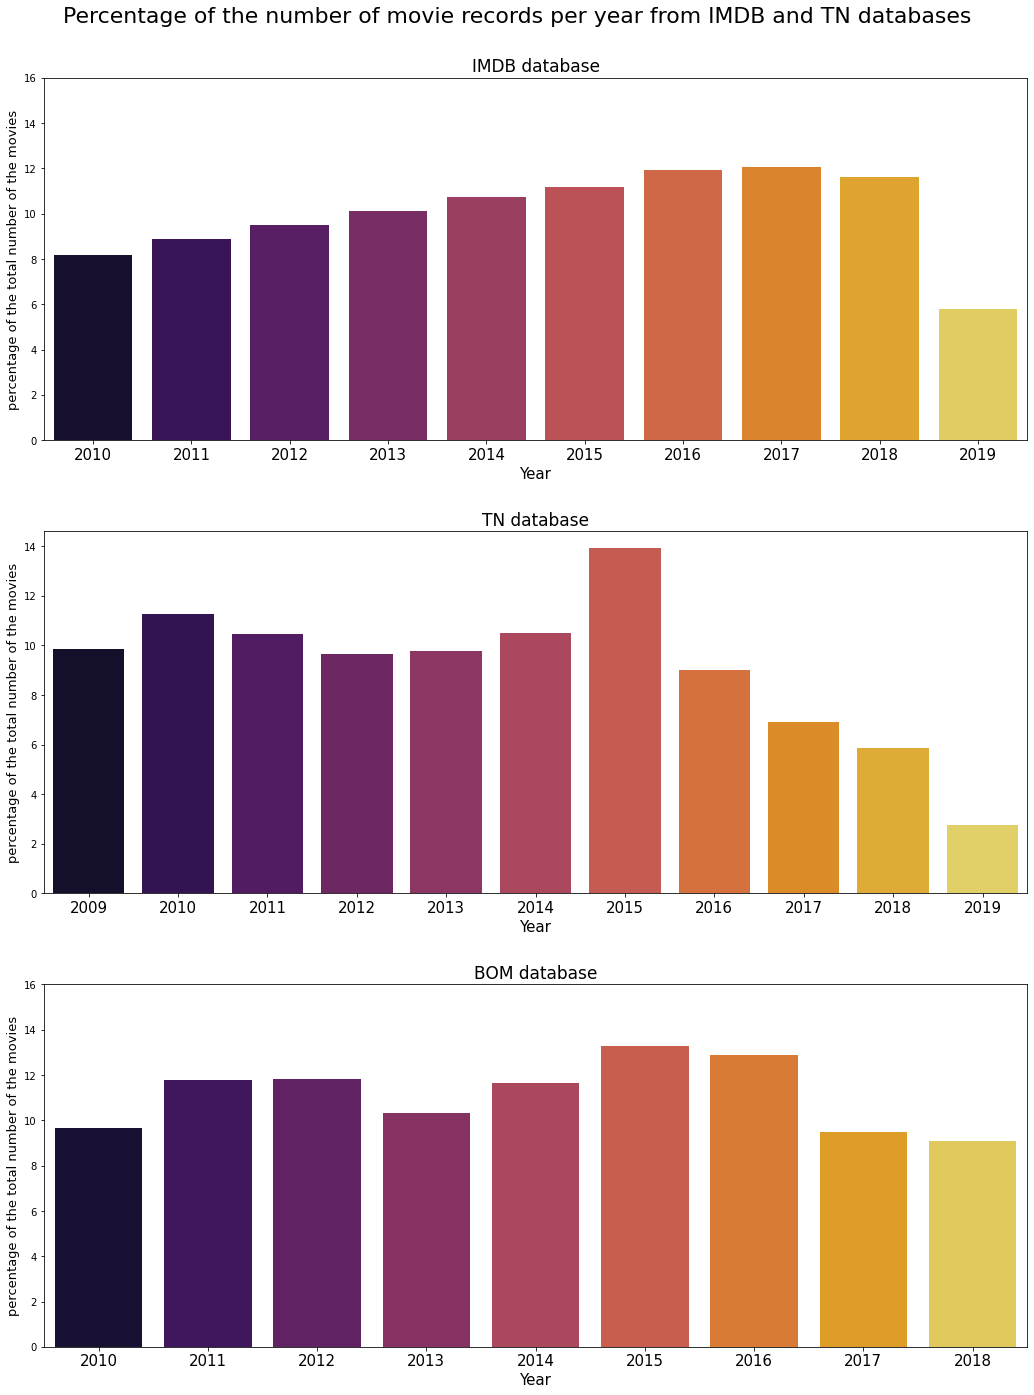

In [61]:
# Visualizing how well movies are reresented in each of the tables for yeach year
# 

fig, axes = plt.subplots(figsize=(15,20), nrows=3)
fig.suptitle('Percentage of the number of movie records per year from IMDB and TN databases', fontsize=22)

sns.barplot(data=df_imdb_year, x='start_year', y='percentage_of_all', ax=axes[0], palette ='inferno')
axes[0].set_title('IMDB database', fontsize=17)
axes[0].set_ylabel('percentage of the total number of the movies', fontsize=13)
axes[0].set_xlabel('Year', fontsize=15)
axes[0].set_xticklabels(df_imdb_year['start_year'], fontsize=15)
axes[0].set_ylim(0, 16)

sns.barplot(data=df_tn_year, x='year',  y='percentage_of_all', ax=axes[1], palette ='inferno')
axes[1].set_title('TN database', fontsize=17)
axes[1].set_ylabel('percentage of the total number of the movies', fontsize=13)
axes[1].set_xlabel('Year', fontsize=15)
axes[1].set_xticklabels(df_tn_year['year'], fontsize=15) 

sns.barplot(data=df_bom_year, x='year',  y='percentage_of_all', ax=axes[2], palette ='inferno')
axes[2].set_title('BOM database', fontsize=17)
axes[2].set_ylabel('percentage of the total number of the movies', fontsize=13)
axes[2].set_xlabel('Year', fontsize=15)
axes[2].set_xticklabels(df_bom_year['year'], fontsize=15) 
axes[2].set_ylim(0, 16)
plt.tight_layout(pad=3)



<div class="alert alert-block alert-danger">The visualization above reflects the fact that the TN and BOM 2009-2019 movies' data is not as illustrative of the overall volume of released movies as the IMDB data is. The other conclusion is that 2019 is not well represented in any of the databases; therefore, the 2019 data f is not sufficiently reliable. However, I decided to leave the records from this year in for this project. These factors should be taken into consideration when evaluating the reliability of the conclusion of this study.
    </div>

## Joining the tables by movie titles  

### bom_movie_gross with tn_movie_budget into df_tn_bom DataFrame and a new table ROI_tn_bom
*** 
* These tables need to be joined on two columns, title and year, because there are movies with the same title but different years on release
* I dropped the rows that have ROI < -99% due to unreliability of the data
* Data from this process is going to be used to identify the **most successful studios** (the highest median ROI is the measurement of success), the overall distribution of ROI (domestic and worldwide) as box plots per year, and the most successful months of the year (highest median ROI per month of the year)
* The DataFrame with all financial measure is going to be saved for future use and visuals; there are **1208** record matched.
***

In [62]:
#Joining tn_movie_budgets and bom_movie_gross table with titles and year of release.
#The year is necessary because there are movies with the same titles but different years of release

q="""SELECT title, bom.year, month, studio, production_budget, tn.domestic_gross 'domestic_gross', 
     worldwide_gross from tn_movie_budgets tn
     JOIN bom_movie_gross bom ON
     (tn.movie=bom.title) AND (tn.year=bom.year)"""

df_tn_bom = table_query(q)

for i in range(len(df_tn_bom['domestic_gross'])):
    row = df_tn_bom['domestic_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_bom['domestic_gross'][i]=row_num
    
for i in range(len(df_tn_bom['production_budget'])):
    row = df_tn_bom['production_budget'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_bom['production_budget'][i]=row_num   
    
for i in range(len(df_tn_bom['worldwide_gross'])):
    row = df_tn_bom['worldwide_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_bom['worldwide_gross'][i]=row_num 

#df_tn_bom['diff'] = df_tn_bom['bom_domestic_gross']-df_tn_bom['tn_domestic_gross']
#df_tn_bom.loc[df_tn_bom['diff']==max(df_tn_bom['diff'])]
#df_tn_bom.sort_values('diff').tail(30)
df_tn_bom['domestic_revenue'] = df_tn_bom['domestic_gross'] - df_tn_bom['production_budget']
df_tn_bom['worldwide_revenue'] = df_tn_bom['worldwide_gross'] - df_tn_bom['production_budget']
df_tn_bom['ROI_domestic'] = df_tn_bom['domestic_revenue']/df_tn_bom['production_budget']*100
df_tn_bom['ROI_worldwide'] = df_tn_bom['worldwide_revenue']/df_tn_bom['production_budget']*100
df_tn_bom.drop(df_tn_bom.loc[df_tn_bom['ROI_worldwide']<=(-99.0)].index, inplace=True)
df_tn_bom.sort_values('ROI_worldwide')

<ipython-input-62-da7ef484df03>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_bom['domestic_gross'][i]=row_num
<ipython-input-62-da7ef484df03>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_bom['production_budget'][i]=row_num
<ipython-input-62-da7ef484df03>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_bom['worldwide_gross'][i]=row_num


,title,year,month,studio,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue,ROI_domestic,ROI_worldwide
1102,13 Sins,2014,4,RTWC,4e+06,9134,47552,-3.99087e+06,-3.95245e+06,-99.7716,-98.8112
834,The Last Godfather,2011,4,RAtt.,1.34e+07,164247,164247,-1.32358e+07,-1.32358e+07,-98.7743,-98.7743
1202,They Will Have to Kill Us First,2016,3,BBC,600000,0,7943,-600000,-592057,-100,-98.6762
729,The Tempest,2010,12,Mira.,2e+07,277943,277943,-1.97221e+07,-1.97221e+07,-98.6103,-98.6103
953,Strangerland,2015,7,Alc,1e+07,17472,161097,-9.98253e+06,-9.8389e+06,-99.8253,-98.389
...,...,...,...,...,...,...,...,...,...,...,...
1115,Paranormal Activity 2,2010,10,Par.,3e+06,8.47529e+07,1.77512e+08,8.17529e+07,1.74512e+08,2725.1,5817.07
1177,Unfriended,2015,4,Uni.,1e+06,3.27896e+07,6.43642e+07,3.17896e+07,6.33642e+07,3178.96,6336.42
1171,Insidious,2011,4,FD,1.5e+06,5.40092e+07,9.98709e+07,5.25092e+07,9.83709e+07,3500.61,6558.06
1176,The Devil Inside,2012,1,Par.,1e+06,5.32629e+07,1.01759e+08,5.22629e+07,1.00759e+08,5226.29,10075.9


In [63]:
#Creating additional table out of this join
df_tn_bom.to_sql('ROI_tn_bom', conn, if_exists='replace', index = False)

In [64]:
display_tableDF('ROI_tn_bom').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1208 non-null   object 
 1   year               1208 non-null   int64  
 2   month              1208 non-null   int64  
 3   studio             1208 non-null   object 
 4   production_budget  1208 non-null   float64
 5   domestic_gross     1208 non-null   float64
 6   worldwide_gross    1208 non-null   float64
 7   domestic_revenue   1208 non-null   float64
 8   worldwide_revenue  1208 non-null   float64
 9   ROI_domestic       1208 non-null   float64
 10  ROI_worldwide      1208 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 103.9+ KB


In [65]:
conn.commit()

### imdb_title_basics with tn_movie_budget into df_tn_imdb DataFrame and a new table ROI_tn_imdb
*** 
* These tables need to be joined on two columns, title and year, because there are movies with the same title but different years on release
* I dropped the rows that have ROI < -99% due to unreliability of the data
* Data from this process is going to be used to identify the **most successful genres** (the highest median ROI is the measurement of success) and overall distribution of ROI (domestic and worldwide) as box plots per year and the most successful months of the year (highest median ROI per month of the year)
* Additional visual will include runtime (buckets) with their average ROI per year (the idea is that over time shorter runtime translates into more profitability
* The DataFrame with all financial measure is going to be saved for future use and visuals; there are **1388** record matched
***

In [66]:
q="""SELECT DISTINCT tconst, primary_title 'title', start_year 'year', month, runtime_minutes, production_budget, tn.domestic_gross 'domestic_gross',
     worldwide_gross FROM imdb_title_basics imdb
     JOIN tn_movie_budgets tn
     ON (imdb.primary_title=tn.movie) AND (imdb.start_year=tn.year)"""

df_tn_imdb = table_query(q)

for i in range(len(df_tn_imdb['domestic_gross'])):
    row = df_tn_imdb['domestic_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb['domestic_gross'][i]=row_num
    
for i in range(len(df_tn_imdb['production_budget'])):
    row = df_tn_imdb['production_budget'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb['production_budget'][i]=row_num   
    
for i in range(len(df_tn_imdb['worldwide_gross'])):
    row = df_tn_imdb['worldwide_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb['worldwide_gross'][i]=row_num 

df_tn_imdb['domestic_revenue'] = df_tn_imdb['domestic_gross'] - df_tn_imdb['production_budget']
df_tn_imdb['worldwide_revenue'] = df_tn_imdb['worldwide_gross'] - df_tn_imdb['production_budget']
df_tn_imdb['ROI_domestic'] = df_tn_imdb['domestic_revenue']/df_tn_imdb['production_budget']*100
df_tn_imdb['ROI_worldwide'] = df_tn_imdb['worldwide_revenue']/df_tn_imdb['production_budget']*100
df_tn_imdb.drop(df_tn_imdb.loc[df_tn_imdb['ROI_worldwide']<=(-99.0)].index, inplace=True)
#df_tn_imdb.sort_values('ROI_worldwide')
df_tn_imdb

<ipython-input-66-a2603e62e1d1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb['domestic_gross'][i]=row_num
<ipython-input-66-a2603e62e1d1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb['production_budget'][i]=row_num
<ipython-input-66-a2603e62e1d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb['worldwide_gross'][i]=row_num


,tconst,title,year,month,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue,ROI_domestic,ROI_worldwide
1,tt0359950,The Secret Life of Walter Mitty,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
2,tt0365907,A Walk Among the Tombstones,2014,9,114.0,2.8e+07,2.60177e+07,6.21086e+07,-1.98232e+06,3.41086e+07,-7.0797,121.816
3,tt0369610,Jurassic World,2015,6,124.0,2.15e+08,6.52271e+08,1.64885e+09,4.37271e+08,1.43385e+09,203.382,666.909
4,tt0376136,The Rum Diary,2011,10,119.0,4.5e+07,1.31098e+07,2.15447e+07,-3.18902e+07,-2.34553e+07,-70.8671,-52.1228
5,tt0383010,The Three Stooges,2012,4,92.0,3e+07,4.43382e+07,5.40522e+07,1.43382e+07,2.40522e+07,47.7941,80.1742
...,...,...,...,...,...,...,...,...,...,...,...,...
1537,tt8155288,Happy Death Day 2U,2019,2,100.0,9e+06,2.8051e+07,6.41795e+07,1.9051e+07,5.51795e+07,211.678,613.106
1541,tt8632862,Fahrenheit 11/9,2018,9,128.0,5e+06,6.35231e+06,6.65372e+06,1.35231e+06,1.65372e+06,27.0461,33.0743
1543,tt9024106,Unplanned,2019,3,106.0,6e+06,1.81076e+07,1.81076e+07,1.21076e+07,1.21076e+07,201.794,201.794
1544,tt9347476,Believe,2016,12,NaN,3.5e+06,890303,890303,-2.6097e+06,-2.6097e+06,-74.5628,-74.5628


In [67]:
#Creating a new table
df_tn_imdb.to_sql('ROI_tn_imdb', conn, if_exists='replace', index = False)

In [68]:
conn.commit()

## Data Modeling
The analysis below is intended to answer four main questions:

***
* What studios are most successful in the movie production business?
* Does the runtime of a movie affect the movie's profitability?
* How does the timing of a movie release affect its' profitability?
* What movie genres are most profitable considering Return of Investment measurement?
***

### Exploratory Analysis of studio profitability data and Visualization of the results

##### Using information in TheNumbers data in conjunction with IMDB data

In [69]:
# How many unique studios are in TheNumbers database
len(df_tn_bom['studio'].unique())

95

In [70]:
q="""SELECT count(*) num_movies, avg(ROI_domestic) ROI, year,
     studio FROM ROI_tn_bom GROUP BY studio, year"""
df_studios_d=table_query(q)

In [71]:
#Only studios with a number of movies per each year of the period 2009-2018 are being considered in this segment
#From this pool studios with very low profitability are removed to make visualization more prominent
#I am also dropping the records from several studios that exibit either very low ROI values or 
#made movies over too few years in the studies period. The decision is made to clean up the visualization

df_studios_d.drop(df_studios_d.loc[df_studios_d['num_movies']<=6].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='IFC'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='LG/S'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='Magn.'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='RAtt.'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='Rela.'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='SPC'].index, inplace=True)

In [72]:
sns.set_context("talk");

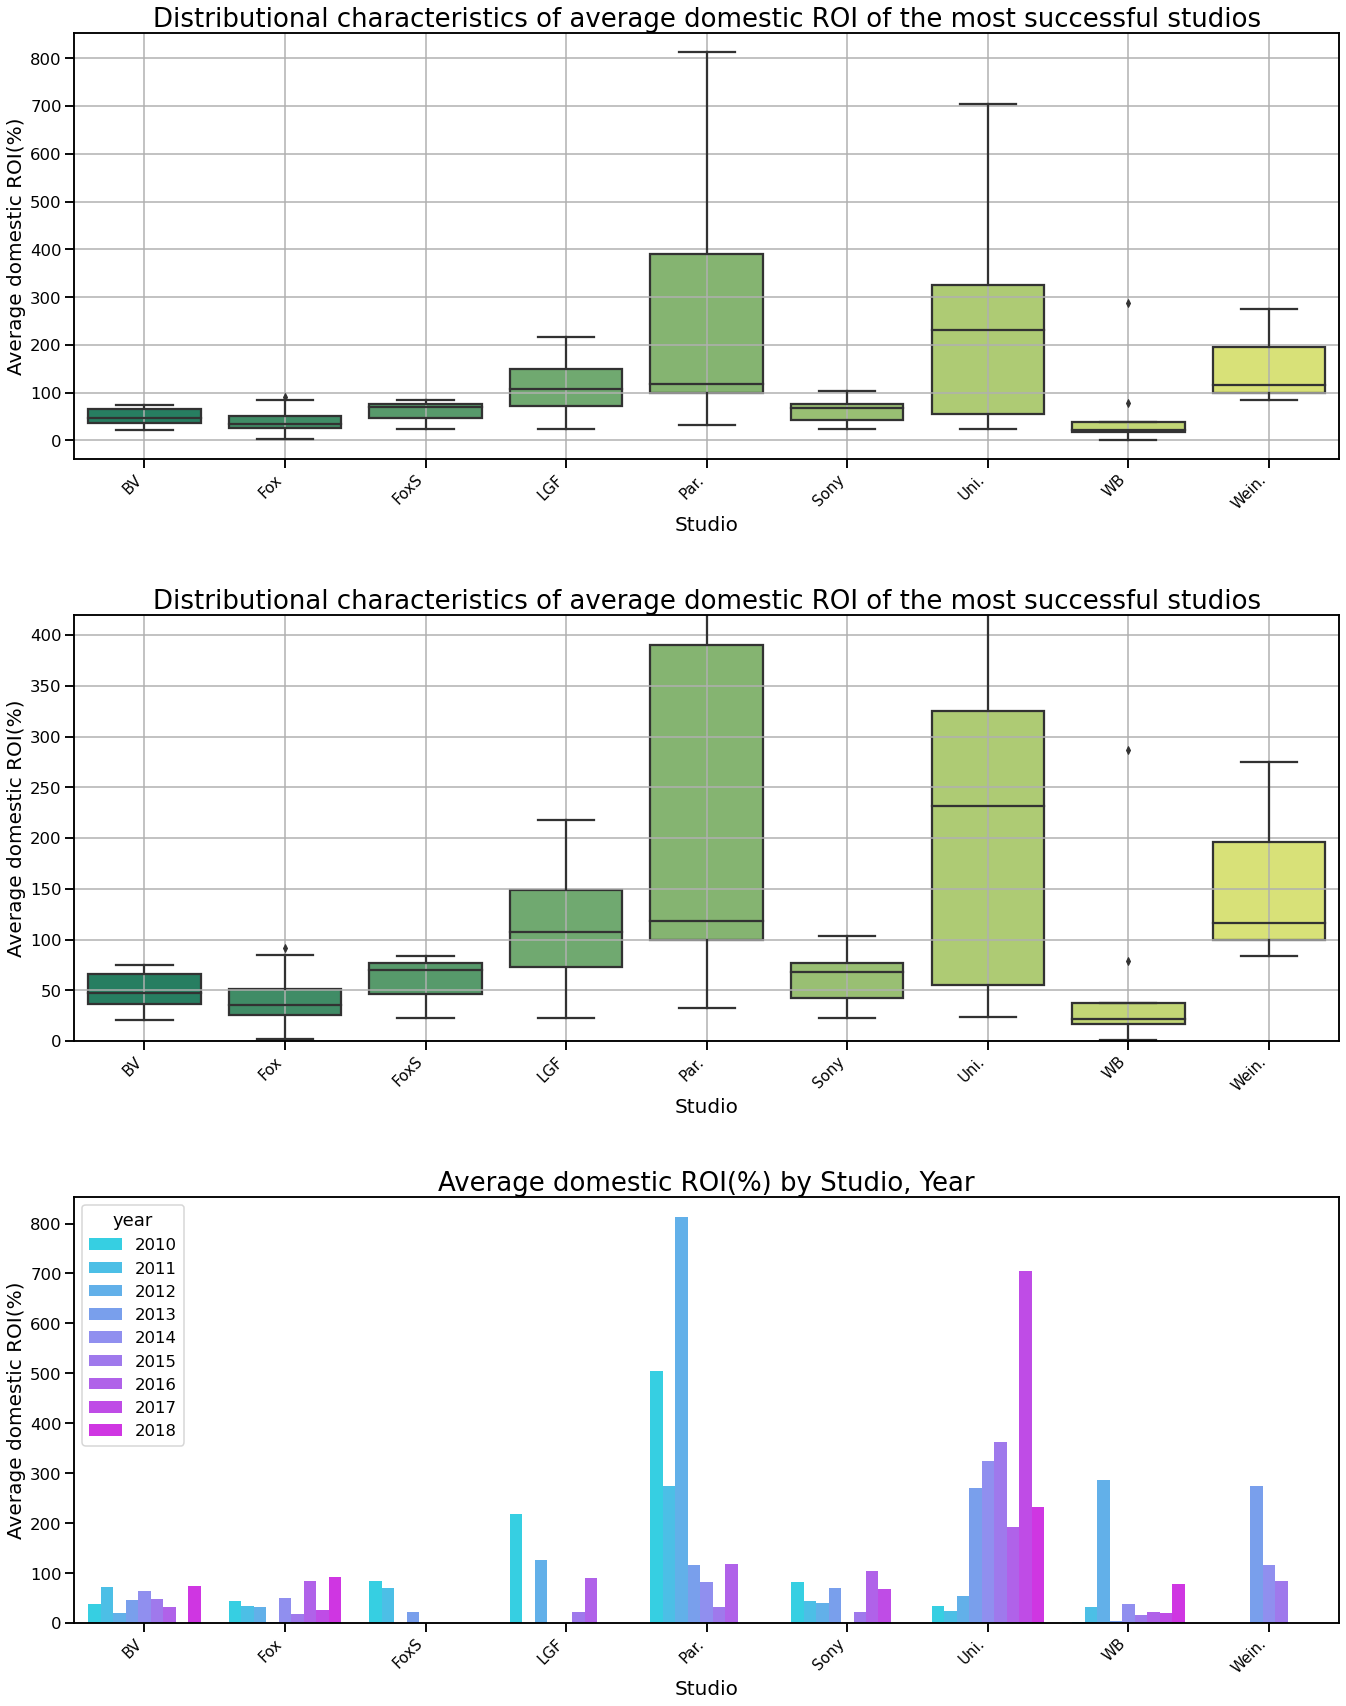

In [73]:
fig, axes = plt.subplots(figsize=(20,25), nrows=3)
sns.boxplot(data=df_studios_d, x="studio", y= "ROI", palette='summer', ax=axes[0])
sns.boxplot(data=df_studios_d, x="studio", y= "ROI", palette='summer', ax=axes[1])
sns.barplot(data=df_studios_d, x="studio", y="ROI", hue="year", palette='cool', ax=axes[2]);

axes[0].set_title("Distributional characteristics of average domestic ROI of the most successful studios", fontsize=26);
axes[0].grid();
axes[0].set_ylabel('Average domestic ROI(%)', fontsize=20);
axes[0].set_xlabel('Studio', fontsize=20);
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=15)
#axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=15)

axes[1].set_title("Distributional characteristics of average domestic ROI of the most successful studios", fontsize=26);
axes[1].set_ylim(0, 420);
axes[1].set_ylabel('Average domestic ROI(%)', fontsize=20);
axes[1].set_xlabel('Studio', fontsize=20);
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=15)
axes[1].grid();

axes[2].set_title("Average domestic ROI(%) by Studio, Year", fontsize=26);
axes[2].set_ylabel('Average domestic ROI(%)', fontsize=20)
axes[2].set_xlabel('Studio', fontsize=20);
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right', fontsize=15)


plt.tight_layout(pad=3)
sns.set_context("talk");

##### Using information in TheNumbers data in conjunction with Box-Office Movie data

<div class="alert alert-block alert-info">
The next step is to investigate worldwide profitability of the movies in the database by using the same approach as above.
</div>

In [74]:
q="""SELECT count(*) num_movies, avg(ROI_worldwide) ROI, year,
     studio FROM ROI_tn_bom GROUP BY studio, year"""
df_studios_w=table_query(q)

In [75]:
#Only studios with a number of movies per each year of the period 2009-2018 are being considered in this segment
#From this pool studios with very low profitability are removed to make visualization more prominent
df_studios_w.drop(df_studios_w.loc[df_studios_w['num_movies']<=6].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='IFC'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='LG/S'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='Magn.'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='RAtt.'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='Rela.'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='SPC'].index, inplace=True)

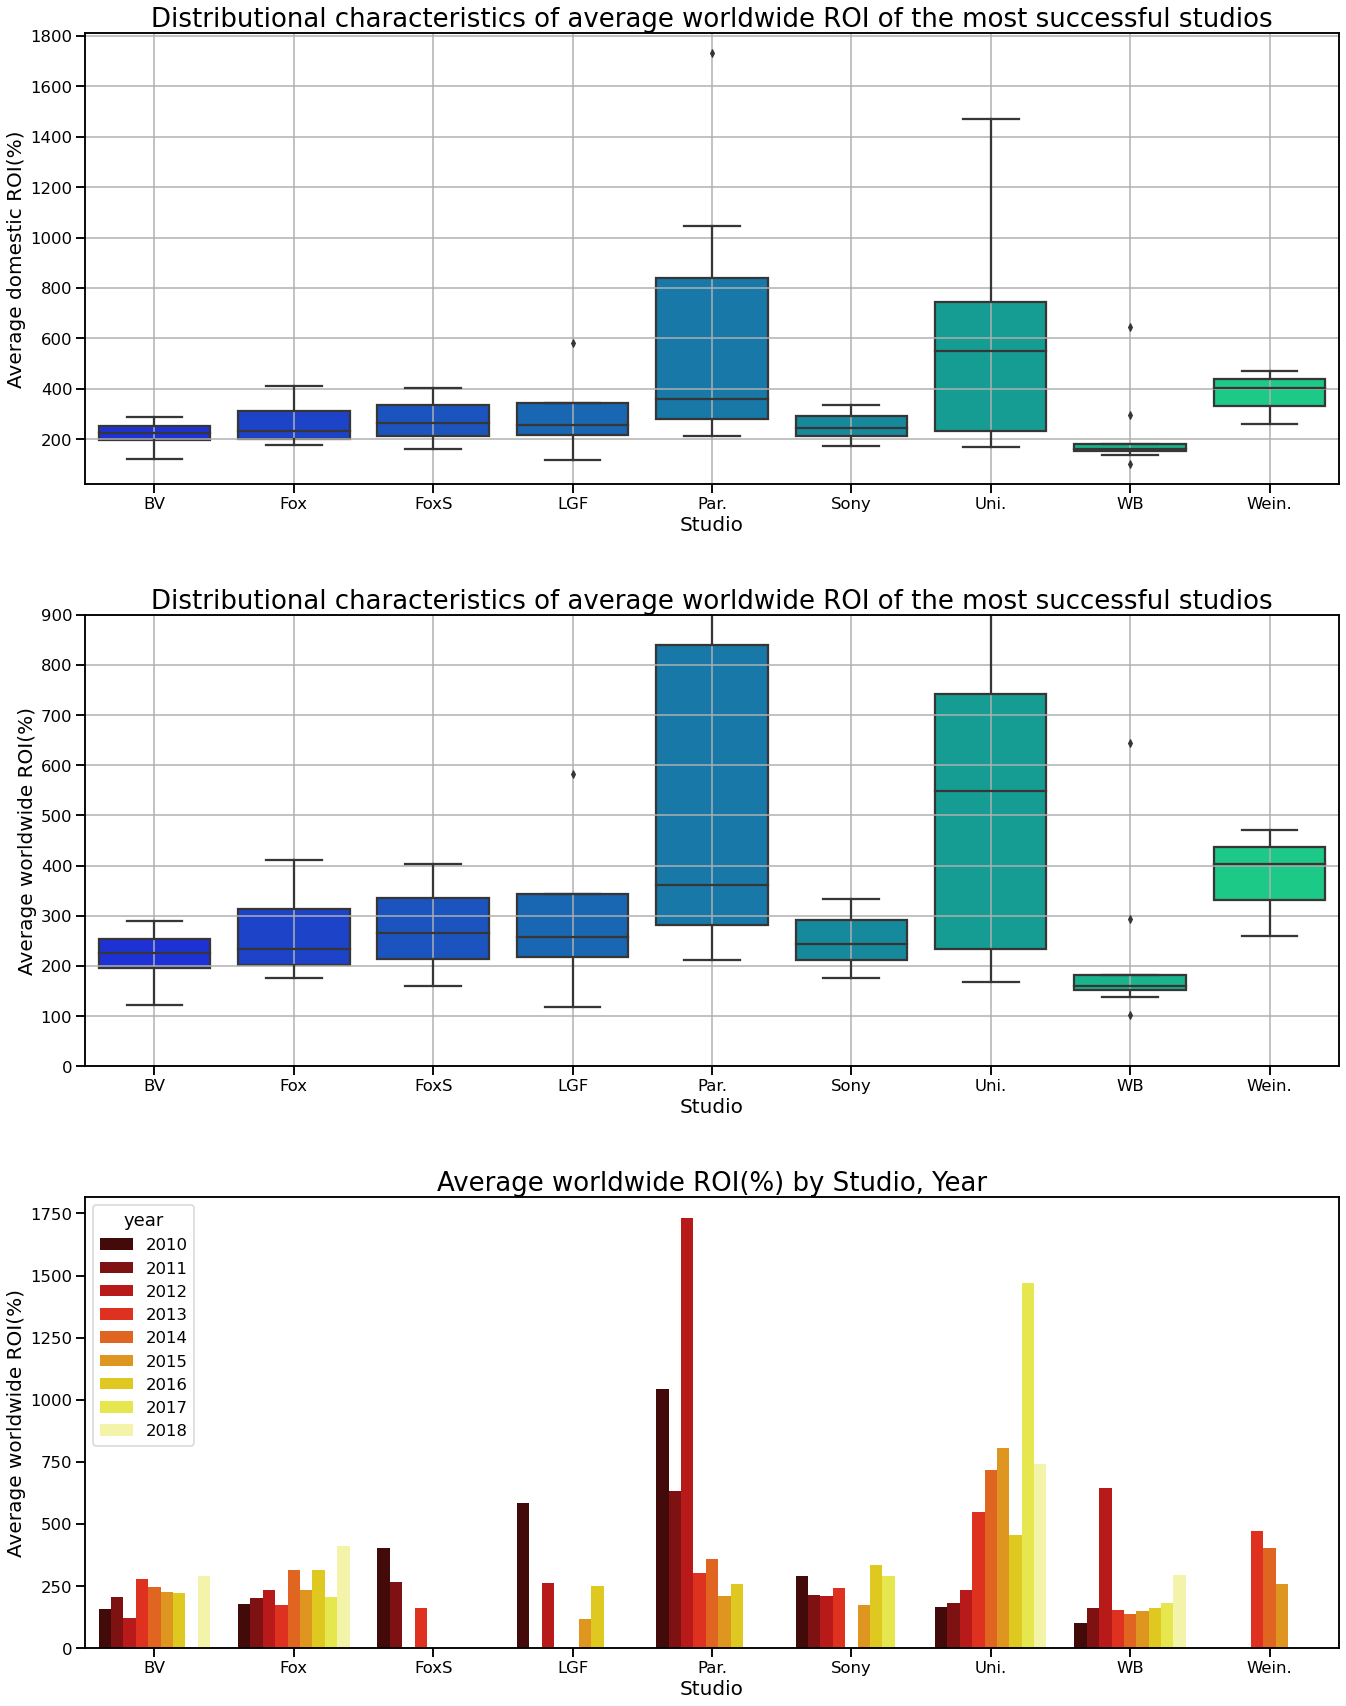

In [76]:
fig, axes = plt.subplots(figsize=(20,25), nrows=3)
sns.boxplot(data=df_studios_w, x="studio", y= "ROI", palette='winter', ax=axes[0])
sns.boxplot(data=df_studios_w, x="studio", y= "ROI", palette='winter', ax=axes[1])
sns.barplot(data=df_studios_w, x="studio", y="ROI", hue="year", palette='hot', ax=axes[2]);

axes[0].set_title("Distributional characteristics of average worldwide ROI of the most successful studios", fontsize=26);
axes[0].grid();
axes[0].set_ylabel('Average domestic ROI(%)', fontsize=20);
axes[0].set_xlabel('Studio', fontsize=20);


axes[1].set_title("Distributional characteristics of average worldwide ROI of the most successful studios", fontsize=26);
axes[1].set_ylim(0, 900);
axes[1].set_ylabel('Average worldwide ROI(%)', fontsize=20);
axes[1].set_xlabel('Studio', fontsize=20);
axes[1].grid();

axes[2].set_title("Average worldwide ROI(%) by Studio, Year", fontsize=26);
axes[2].set_ylabel('Average worldwide ROI(%)', fontsize=20)
axes[2].set_xlabel('Studio', fontsize=20);


plt.tight_layout(pad=3)
sns.set_context("talk");

#### Conclusion of the analysis of the data above, based on Box-Office Mojo  and TheNumbers financial data:
<div class="alert alert-block alert-info">
Universal Studios, Paramount Pictures, The Weinstein Company, and Lions Gate Films Corporation studios (in that order) have been the most successful studios for the last nine years. The median of the average domestic ROI for these studios is above 100%, and lower and upper quartiles are between 50% and 400%, with wiskers of all four never going below the red line.<br>
&#8195;<br>The same tendencies can be observed in the analysis of movies' worldwide profitability by major players in the industry. Universal Studios, Paramount Picture, The Weinstein Company, and Lions Gate Films Corporation studios remain the most successful American studios globally. However, all of the studios under consideration maintained an average ROI above 100%.
</div>

### Exploratory Analysis of runtime changes over the last 10 years and its' possible correlation with profitability

In [77]:
q="""SELECT  year, AVG(runtime_minutes) average_runtime FROM ROI_tn_imdb GROUP BY year"""
df_runtime=table_query(q)
df_runtime

,year,average_runtime
0,2010,104.907407
1,2011,104.884393
2,2012,108.260563
3,2013,109.537037
4,2014,108.159236
5,2015,108.112500
6,2016,109.915033
7,2017,108.932203
8,2018,111.818966
9,2019,112.531250


In [78]:
df_ROI_runtime= display_tableDF('ROI_tn_imdb')

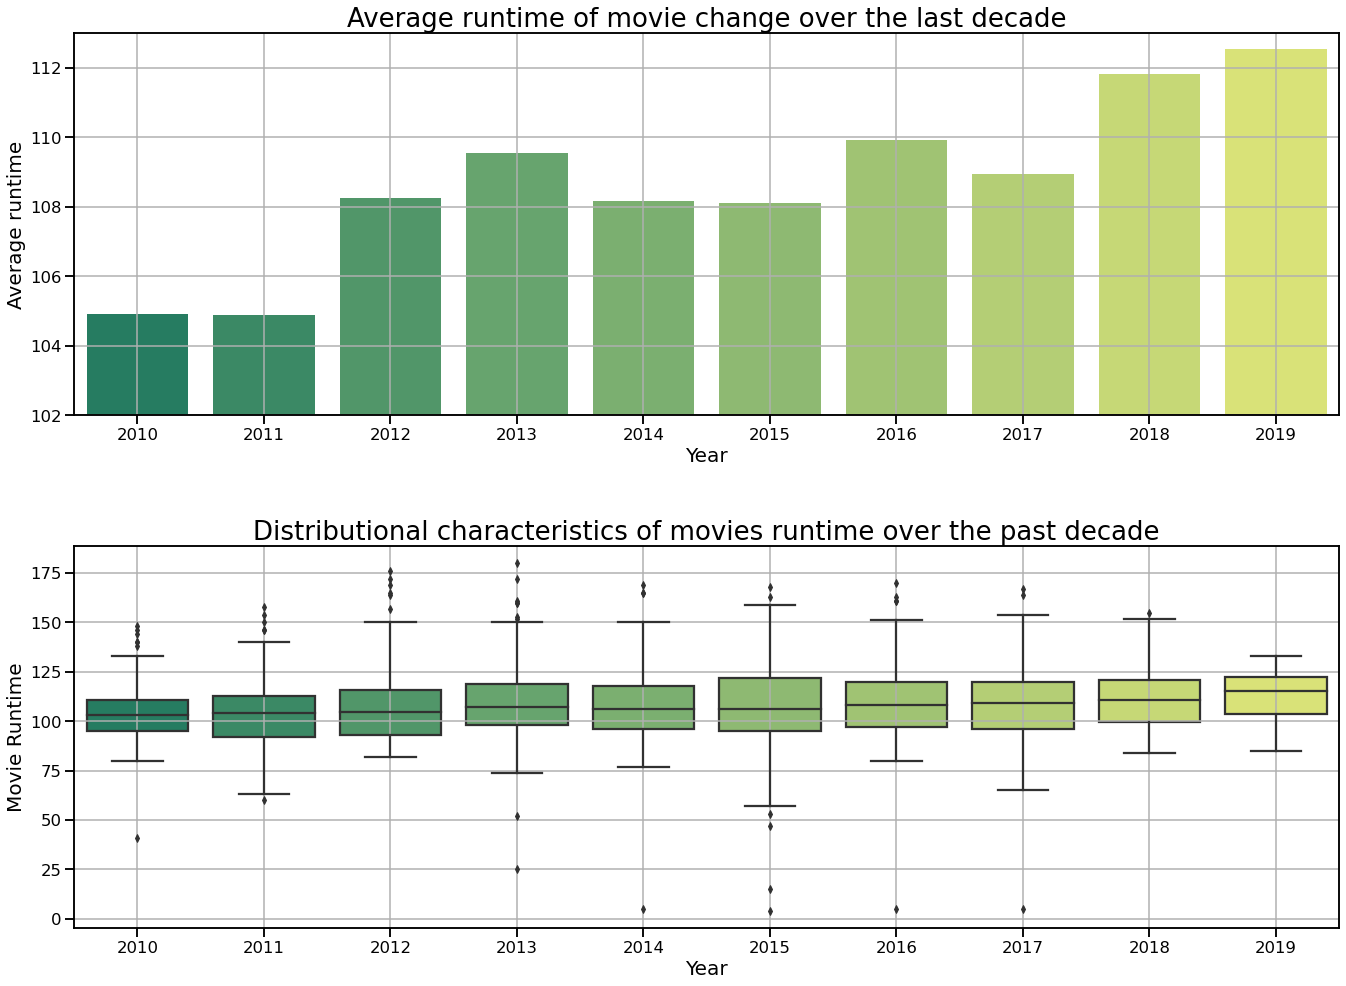

In [79]:
fig, axes = plt.subplots(figsize=(20,15), nrows=2)
sns.barplot(data=df_runtime, x="year", y="average_runtime", palette='summer',ax=axes[0]);

axes[0].set_ylim(102, 113);
axes[0].set_title("Average runtime of movie change over the last decade", fontsize=26);
axes[0].set_ylabel('Average runtime', fontsize=20);
axes[0].set_xlabel('Year', fontsize=20);
axes[0].grid();

sns.boxplot(data=df_ROI_runtime, x="year", y="runtime_minutes", palette='summer',ax=axes[1]);

axes[1].set_title("Distributional characteristics of movies runtime over the past decade", fontsize=26);
axes[1].set_ylabel('Movie Runtime', fontsize=20);
axes[1].set_xlabel('Year', fontsize=20);
axes[1].grid();

plt.tight_layout(pad=3)

#### Conclusion of the analysis of the data above:
<div class="alert alert-block alert-info">
Though the average runtime of a movie within the industry grew between years 2010 and 2019, the tendency is very weakly pronounced and is within the margin of error.<br>
</div>

### ROI statistics evaluation

In [80]:
#DEscribing statistical measures of ROI (domestically and worldwide) based on the data in TN and IMBD joined data
q="""SELECT  year, ROI_domestic, ROI_worldwide FROM ROI_tn_imdb"""
df_ROI_stat=table_query(q)
df_ROI_stat.describe()

,year,ROI_domestic,ROI_worldwide
count,1388.000000,1388.000000,1388.000000
mean,2013.888329,100.937681,304.048304
std,2.612389,681.511253,1248.468460
min,2010.000000,-100.000000,-98.906170
25%,2012.000000,-55.890353,8.420845
50%,2014.000000,2.602221,135.418452
75%,2016.000000,110.078026,320.349247
max,2019.000000,22664.410000,41556.474000


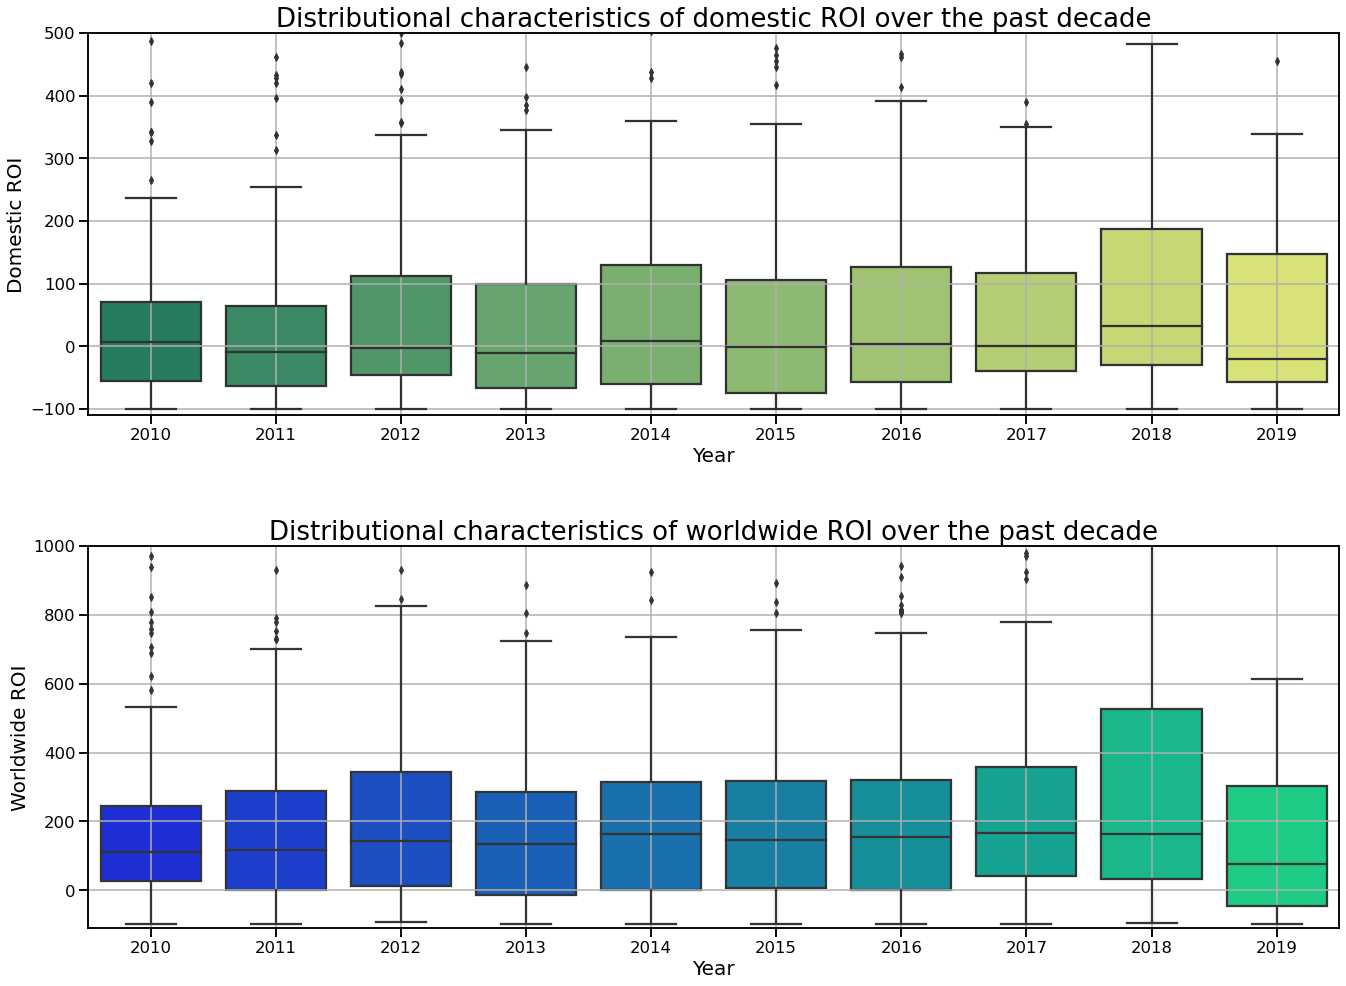

In [81]:
fig, axes = plt.subplots(figsize=(20,15), nrows=2)
sns.boxplot(data=df_ROI_stat, x="year", y="ROI_domestic", palette='summer',ax=axes[0]);

axes[0].set_ylim(-110, 500);
axes[0].set_title("Distributional characteristics of domestic ROI over the past decade", fontsize=26);
axes[0].set_ylabel('Domestic ROI', fontsize=20);
axes[0].set_xlabel('Year', fontsize=20);
axes[0].grid();

sns.boxplot(data=df_ROI_stat, x="year", y="ROI_worldwide", palette='winter',ax=axes[1]);

axes[1].set_ylim(-110, 1000);
axes[1].set_title("Distributional characteristics of worldwide ROI over the past decade", fontsize=26);
axes[1].set_ylabel('Worldwide ROI', fontsize=20);
axes[1].set_xlabel('Year', fontsize=20);
axes[1].grid();

plt.tight_layout(pad=3)

#### Conclusion of the analysis of the data above:
<div class="alert alert-block alert-info">
Though the distribution of domestic ROI shows its' median over the years remaining close to 0%, the overall tendency is shifted toward the upper quartile, and the mean is close to 100% <br>
The distribution of worldwide ROI assures a more promising outcome for a newcomer studio with lower and upper quartiles above 0% and the mean of the distribution slightly above 300%.<br><br>
A customer should be advised to expand into foreign markets to increase their overall profit. Additional analysis is suggested for the most promising foreign markets (needs more data)
</div>

### Exploratory analysis of month of release/ROI correlation

#### Analysis based on joined ROI_tn_imdb table

In [82]:
#creating a DataFrame out of TN IMDB data

q="""SELECT  month, ROI_domestic, ROI_worldwide FROM ROI_tn_imdb"""
df_ROI_stat_month=table_query(q)
df_ROI_stat_month

,month,ROI_domestic,ROI_worldwide
0,12,-36.003475,106.440860
1,9,-7.079696,121.816382
2,6,203.381686,666.909239
3,10,-70.867078,-52.122818
4,4,47.794080,80.174163
...,...,...,...
1383,2,211.678278,613.105500
1384,9,27.046120,33.074300
1385,3,201.793683,201.793683
1386,12,-74.562771,-74.562771


In [83]:
#Replacing month numbers by their names for better visualization

q="""SELECT  month, count(*) num_movies FROM ROI_tn_imdb GROUP by month"""
df_num_month=table_query(q)
df_num_month

months={1:'January', 2: 'February', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
         9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_num_month['month']=df_num_month['month'].map(months)
df_num_month

,month,num_movies
0,January,68
1,February,86
2,March,123
3,April,98
4,May,93
5,June,116
6,July,118
7,August,114
8,September,138
9,October,149


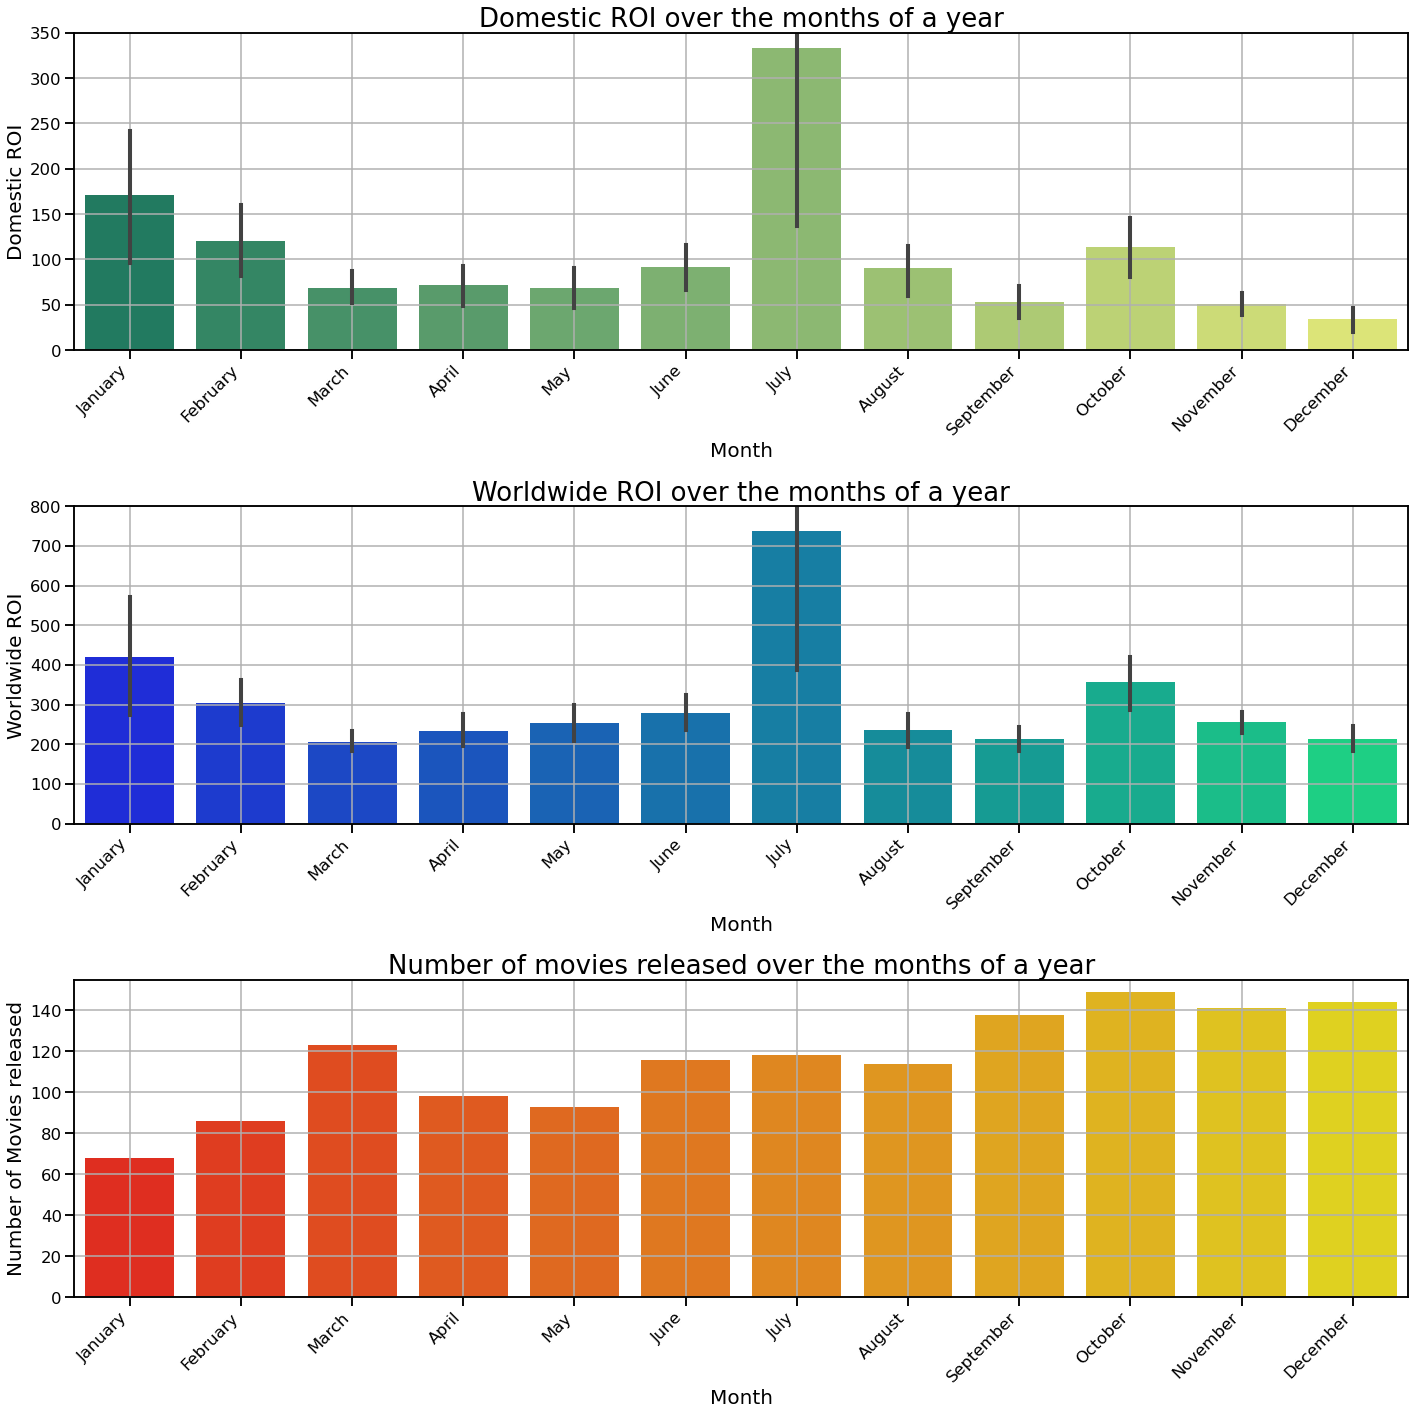

In [84]:
fig, axes = plt.subplots(figsize=(20,20), nrows=3)
sns.barplot(data=df_ROI_stat_month, x="month", y="ROI_domestic", palette='summer',ax=axes[0], ci=65);

axes[0].set_ylim(0, 350);
axes[0].set_title("Domestic ROI over the months of a year", fontsize=26);
axes[0].set_ylabel('Domestic ROI', fontsize=20);
axes[0].set_xlabel('Month', fontsize=20);
axes[0].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[0].grid();

sns.barplot(data=df_ROI_stat_month, x="month", y="ROI_worldwide", palette='winter',ax=axes[1], ci=65);

axes[1].set_ylim(0, 800);
axes[1].set_title('Worldwide ROI over the months of a year', fontsize=26);
axes[1].set_ylabel('Worldwide ROI', fontsize=20);
axes[1].set_xlabel('Month', fontsize=20);
axes[1].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[1].grid();

sns.barplot(data=df_num_month, x="month", y="num_movies", palette='autumn',ax=axes[2], ci=65);

axes[2].set_ylim(0, 155);
axes[2].set_title("Number of movies released over the months of a year", fontsize=26);
axes[2].set_ylabel('Number of Movies released', fontsize=20);
axes[2].set_xlabel('Month', fontsize=20);
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].grid();

plt.tight_layout()

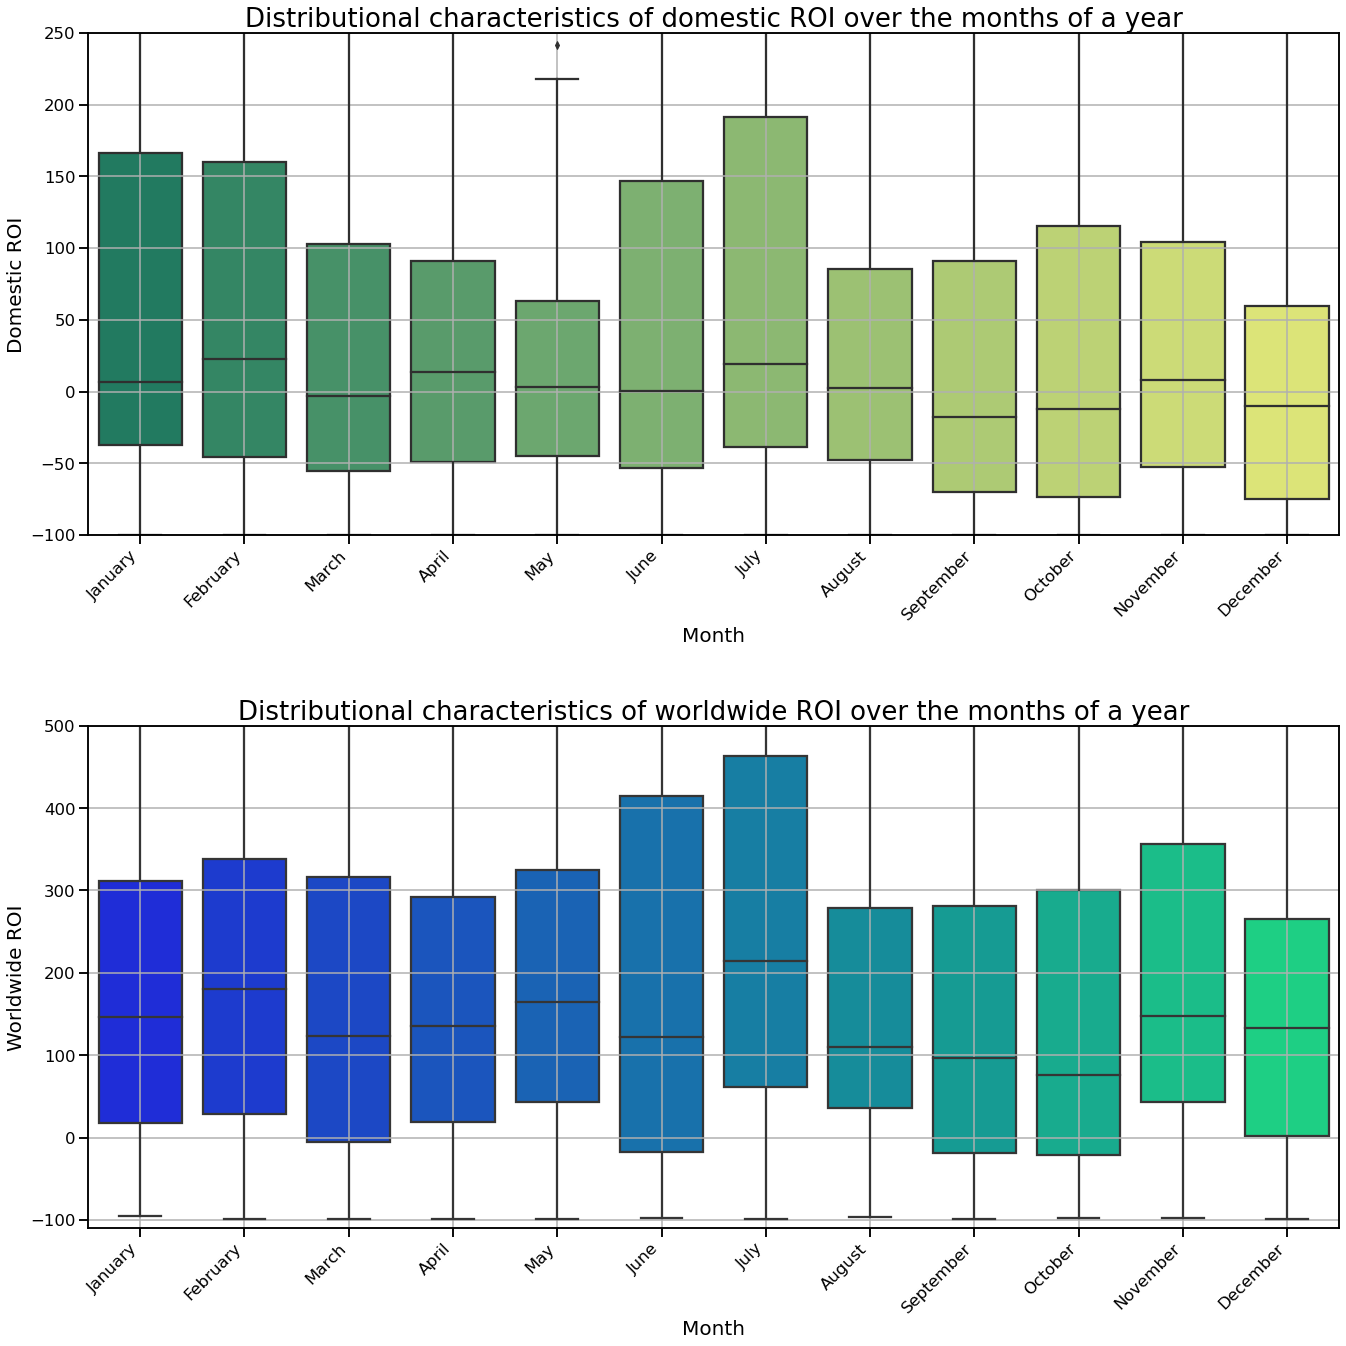

In [85]:
# This visualization is for my own evaluation of the statistics of ROI values and to confirm the results above

fig, axes = plt.subplots(figsize=(20,20), nrows=2)
sns.boxplot(data=df_ROI_stat_month, x="month", y="ROI_domestic", palette='summer',ax=axes[0]);

axes[0].set_ylim(-100, 250);
axes[0].set_title("Distributional characteristics of domestic ROI over the months of a year", fontsize=26);
axes[0].set_ylabel('Domestic ROI', fontsize=20);
axes[0].set_xlabel('Month', fontsize=20);
axes[0].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[0].grid();

sns.boxplot(data=df_ROI_stat_month, x="month", y="ROI_worldwide", palette='winter',ax=axes[1]);

axes[1].set_ylim(-110, 500);
axes[1].set_title("Distributional characteristics of worldwide ROI over the months of a year", fontsize=26);
axes[1].set_ylabel('Worldwide ROI', fontsize=20);
axes[1].set_xlabel('Month', fontsize=20);
axes[1].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[1].grid();

plt.tight_layout(pad=3)

<div class="alert alert-block alert-info">
The data above suggests that there might be a negative correlation between the number of the movies released and the ROI (domestic and worldwide), which might be related to the choice of released movies customers have in a particular month as well as holidays and weather in each month.
</div>

#### Exploring correlations between average ROIs (domestic and worldwide)

In [86]:
# Bringing up a correlation matrix to confirm or otherwise the conclusion drawn above
q="""SELECT  month, AVG(ROI_domestic) AVG_dom_ROI, AVG(ROI_worldwide) AVG_ww_ROI, count(*) num_movies FROM ROI_tn_imdb GROUP by month"""
df_ROI_month_num=table_query(q)
df_ROI_month_num
df_ROI_month_num.corr(method='pearson')

,month,AVG_dom_ROI,AVG_ww_ROI,num_movies
month,1.000000,-0.251537,-0.114142,0.882608
AVG_dom_ROI,-0.251537,1.000000,0.980399,-0.274592
AVG_ww_ROI,-0.114142,0.980399,1.000000,-0.162320
num_movies,0.882608,-0.274592,-0.162320,1.000000


<div class="alert alert-block alert-success">There are negative correlations indeed. 
They are not very strong ones, and the correlation with the average  ROI is less pronounced abroad. The fact of the difference might be related to the fact that all three factors, the number of released movies, holidays, and weather, domestically and abroad, are different, and the picture is less pronounced<br>
</div>

#### Visual exploration of the correlations between average ROIs (domestic and worldwide)
<div class="alert alert-block alert-info">
Because any visual information is consumed by the general public better, the correlation is presented in a visual form.
</div>

In [87]:
months={1:'January', 2: 'February', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_ROI_month_num['month']=df_ROI_month_num['month'].map(months)
df_ROI_month_num

,month,AVG_dom_ROI,AVG_ww_ROI,num_movies
0,January,171.390237,419.234690,68
1,February,119.888883,304.706920,86
2,March,68.399687,206.108429,123
3,April,71.700163,234.234485,98
4,May,68.384754,253.086232,93
5,June,91.143942,278.057627,116
6,July,333.312316,736.334952,118
7,August,90.342197,234.981215,114
8,September,52.931118,214.220586,138
9,October,113.122930,358.019641,149


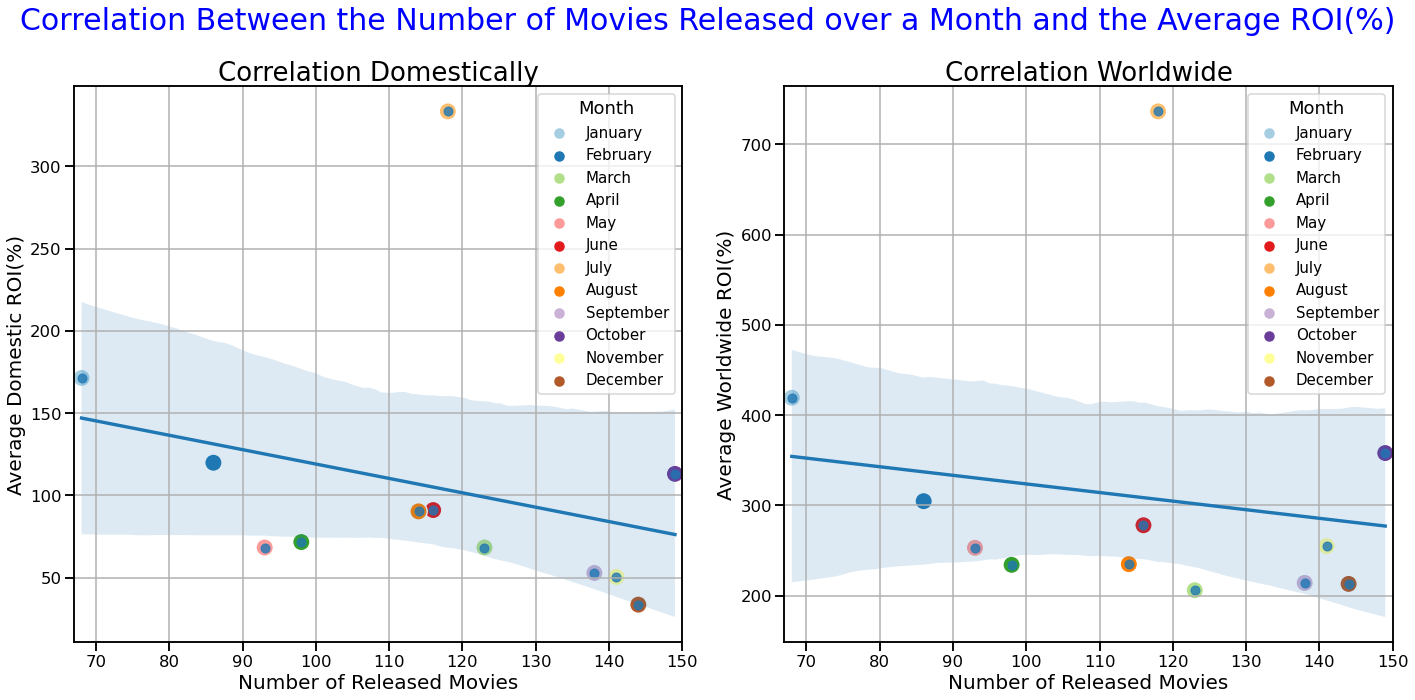

In [88]:
fig, axes = plt.subplots(figsize=(20,10), ncols=2)
sns.scatterplot(data=df_ROI_month_num, x="num_movies", y="AVG_dom_ROI", hue ='month', palette='Paired', s=300,
                  ax=axes[0])
sns.scatterplot(data=df_ROI_month_num, x="num_movies", y="AVG_ww_ROI", hue='month', palette='Paired', s=300,
               ax=axes[1])

sns.regplot(data=df_ROI_month_num, x="num_movies", y="AVG_dom_ROI", ax=axes[0])
sns.regplot(data=df_ROI_month_num, x="num_movies", y="AVG_ww_ROI", ax=axes[1])

axes[0].set_title("Correlation Domestically", fontsize=26);
axes[0].set_xlabel('Number of Released Movies', fontsize=20)
axes[0].set_ylabel('Average Domestic ROI(%)', fontsize=20)
axes[0].grid()
axes[0].set_xlim(67, 150);
axes[0].legend(title='Month', loc='upper right', fontsize=15)

axes[1].set_title("Correlation Worldwide", fontsize=26);
axes[1].set_ylabel('Average Worldwide ROI(%)', fontsize=20);
axes[1].set_xlabel('Number of Released Movies', fontsize=20);
axes[1].grid();
axes[1].set_xlim(67, 150);
axes[1].legend(title='Month', loc='upper right', fontsize=15)

plt.suptitle("Correlation Between the Number of Movies Released over a Month and the Average ROI(%)", size=30, c="Blue")
plt.tight_layout()

#### Conclusion of the analysis of the data above:
<div class="alert alert-block alert-success">
The negative correlation between the number of movies released over a time period suggests that the customer should consider this factor when planning a movie release. The only exception is the month of July, an outlier among other months of a year. It seems that no matter how many movies are in the theaters, it will be more profitable than in other months of the year.
</div>

### Exploratory Analysis of Genre effect on movies profitability and Visualization of the results

#### Exploration of Single Genre effect on ROI of a movie (domestic and worldwide)
<div class="alert alert-block alert-info">In this section, we are going to explore how profitable movies of a particular genre are, based on the data in IMDB and TN databases.
    </div>

In [89]:
#Joining IMDB and TN databases with genres as a column

q="""SELECT DISTINCT tconst, primary_title title, genres, start_year year, month, runtime_minutes,
     production_budget, tn.domestic_gross domestic_gross,
     worldwide_gross FROM imdb_title_basics imdb
     JOIN tn_movie_budgets tn
     ON (imdb.primary_title=tn.movie) AND (imdb.start_year=tn.year)"""

df_tn_imdb_genres = table_query(q)


for i in range(len(df_tn_imdb_genres['domestic_gross'])):
    row = df_tn_imdb_genres['domestic_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb_genres['domestic_gross'][i]=row_num
    
for i in range(len(df_tn_imdb_genres['production_budget'])):
    row = df_tn_imdb_genres['production_budget'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb_genres['production_budget'][i]=row_num   
    
for i in range(len(df_tn_imdb_genres['worldwide_gross'])):
    row = df_tn_imdb_genres['worldwide_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb_genres['worldwide_gross'][i]=row_num 

df_tn_imdb_genres['domestic_revenue'] = df_tn_imdb_genres['domestic_gross'] - df_tn_imdb_genres['production_budget']
df_tn_imdb_genres['worldwide_revenue'] = df_tn_imdb_genres['worldwide_gross'] - df_tn_imdb_genres['production_budget']
df_tn_imdb_genres['ROI_domestic'] = df_tn_imdb_genres['domestic_revenue']/df_tn_imdb_genres['production_budget']*100
df_tn_imdb_genres['ROI_worldwide'] = df_tn_imdb_genres['worldwide_revenue']/df_tn_imdb_genres['production_budget']*100
df_tn_imdb_genres.drop(df_tn_imdb_genres.loc[df_tn_imdb_genres['ROI_worldwide']<=(-99.0)].index, inplace=True)
#df_tn_imdb.sort_values('ROI_worldwide')
df_tn_imdb_genres

<ipython-input-89-32ed9c593cb4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb_genres['domestic_gross'][i]=row_num
<ipython-input-89-32ed9c593cb4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb_genres['production_budget'][i]=row_num
<ipython-input-89-32ed9c593cb4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb_genres['worldwide_gross'][i]=row_num


,tconst,title,genres,year,month,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue,ROI_domestic,ROI_worldwide
3,tt0359950,The Secret Life of Walter Mitty,Adventure,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
4,tt0359950,The Secret Life of Walter Mitty,Comedy,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
5,tt0359950,The Secret Life of Walter Mitty,Drama,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
6,tt0365907,A Walk Among the Tombstones,Action,2014,9,114.0,2.8e+07,2.60177e+07,6.21086e+07,-1.98232e+06,3.41086e+07,-7.0797,121.816
7,tt0365907,A Walk Among the Tombstones,Crime,2014,9,114.0,2.8e+07,2.60177e+07,6.21086e+07,-1.98232e+06,3.41086e+07,-7.0797,121.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,tt8632862,Fahrenheit 11/9,Documentary,2018,9,128.0,5e+06,6.35231e+06,6.65372e+06,1.35231e+06,1.65372e+06,27.0461,33.0743
3880,tt9024106,Unplanned,Biography,2019,3,106.0,6e+06,1.81076e+07,1.81076e+07,1.21076e+07,1.21076e+07,201.794,201.794
3881,tt9024106,Unplanned,Drama,2019,3,106.0,6e+06,1.81076e+07,1.81076e+07,1.21076e+07,1.21076e+07,201.794,201.794
3882,tt9347476,Believe,Unknown,2016,12,NaN,3.5e+06,890303,890303,-2.6097e+06,-2.6097e+06,-74.5628,-74.5628


In [90]:
#Creating a new table
df_tn_imdb_genres.to_sql('ROI_tn_imdb_genres', conn, if_exists='replace', index = False)

In [91]:
conn.commit()

In [92]:
#How many unique genres are there?
len(df_tn_imdb_genres['genres'].unique())

22

In [93]:
q="""SELECT count(*) num_movies, avg(ROI_domestic) ROI_d, avg(ROI_worldwide) ROI_w, genres 
     FROM ROI_tn_imdb_genres GROUP BY genres"""
df_ROI_genres=table_query(q)
df_ROI_genres

,num_movies,ROI_d,ROI_w,genres
0,410,14.016189,184.090202,Action
1,340,22.883264,217.499552,Adventure
2,97,43.555617,282.592459,Animation
3,130,81.652163,251.161007,Biography
4,474,82.976304,242.476102,Comedy
5,218,19.295245,130.768016,Crime
6,45,106.361963,230.621110,Documentary
7,672,79.986621,244.995889,Drama
8,87,45.364585,172.140462,Family
9,116,50.135361,235.957915,Fantasy


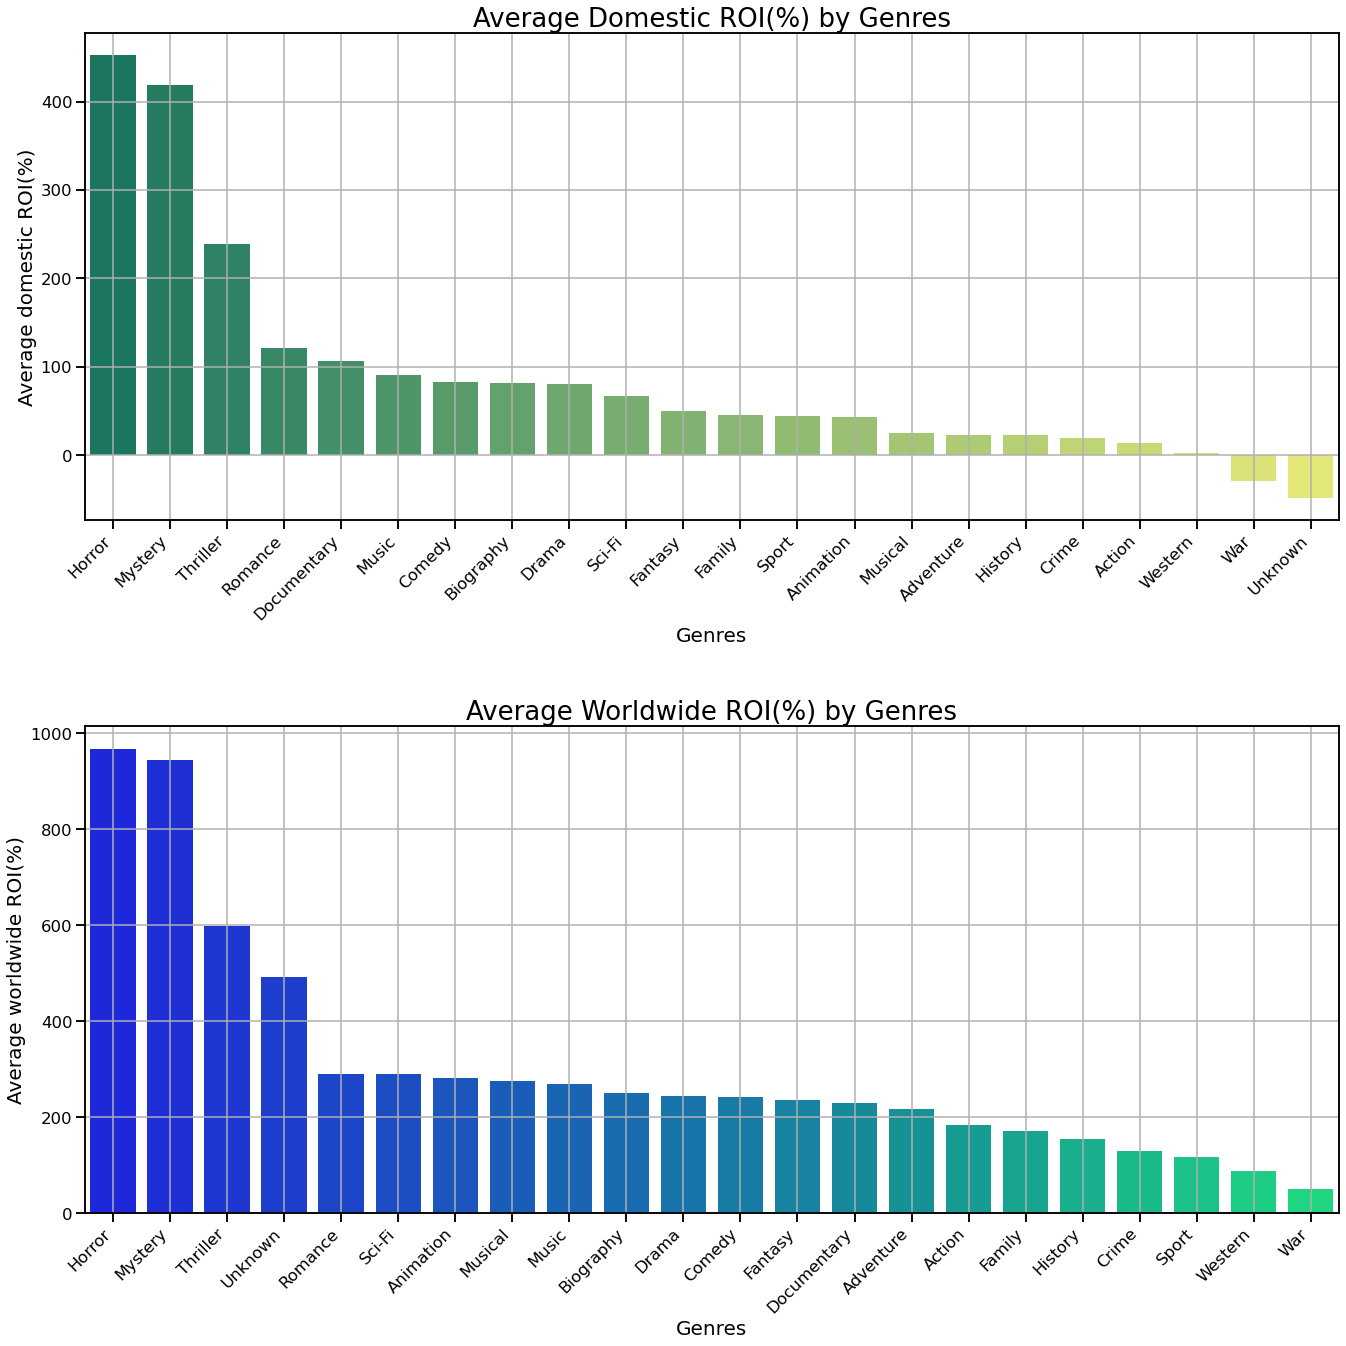

In [94]:
#Answering the question what genres are most profitable in average ROI terms, no gross income

fig, axes = plt.subplots(figsize=(20,20), nrows=2)
sns.barplot(data=df_ROI_genres, x="genres", y="ROI_d", palette='summer', 
            order=df_ROI_genres.sort_values('ROI_d', ascending = False).genres, ax=axes[0]);
sns.barplot(data=df_ROI_genres, x="genres", y="ROI_w", palette='winter',
            order=df_ROI_genres.sort_values('ROI_w', ascending = False).genres, ax=axes[1]);


axes[0].set_title("Average Domestic ROI(%) by Genres", fontsize=26);
axes[0].set_ylabel('Average domestic ROI(%)', fontsize=20)
axes[0].set_xlabel('Genres', fontsize=20);
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid();

axes[1].set_title("Average Worldwide ROI(%) by Genres", fontsize=26);
axes[1].set_ylabel('Average worldwide ROI(%)', fontsize=20)
axes[1].set_xlabel('Genres', fontsize=20);
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid();

plt.tight_layout(pad=3)
sns.set_context("talk");

#### Conclusion of the analysis of the data in this subsection:
<div class="alert alert-block alert-success">
Conclusions of the analysis in this subsection are that the three most profitable genres are Horror, Mystery, and Thriller (in that order), both domestically and abroad. The strong presence of the "Unknown" category of movies internationally might be partly due to a practice of categorizing them abroad differently. It is just a guess, but given the significance of the difference, the issue should not be brushed aside but further investigated.
    </div>

#### Exploration of an  effect of production budget on gross income of a movie
<div class="alert alert-block alert-info">In this section, we are going to explore how profitable movies are based on their production budgets. The data used in this section are from IMDB and TN tables.
    </div>

In [95]:
# DataFrame with budget, gross income and genres
q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres"""
df_budget_gross_income=table_query(q)
df_budget_gross_income

,budget,domestic_gross,worldwide_gross,genres
0,91000000.0,58236838.0,187861183.0,Adventure
1,91000000.0,58236838.0,187861183.0,Comedy
2,91000000.0,58236838.0,187861183.0,Drama
3,28000000.0,26017685.0,62108587.0,Action
4,28000000.0,26017685.0,62108587.0,Crime
...,...,...,...,...
3543,5000000.0,6352306.0,6653715.0,Documentary
3544,6000000.0,18107621.0,18107621.0,Biography
3545,6000000.0,18107621.0,18107621.0,Drama
3546,3500000.0,890303.0,890303.0,Unknown


In [96]:
# Pearson correlation for the daraFrame above
df_budget_gross_income.corr(method='pearson')

,budget,domestic_gross,worldwide_gross
budget,1.000000,0.697090,0.774382
domestic_gross,0.697090,1.000000,0.943957
worldwide_gross,0.774382,0.943957,1.000000


<div class="alert alert-block alert-info">
<t> Based on the Pearson correlation coefficients averaged over the past decade, the correlation between the gross income and the movie budget is strong both domestically and worldwide. Now let's represent it visually.
</div>

<ipython-input-97-ac2ba7c2ce5c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels)
<ipython-input-97-ac2ba7c2ce5c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(ylabels)
<ipython-input-97-ac2ba7c2ce5c>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels)
<ipython-input-97-ac2ba7c2ce5c>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(ylabels)


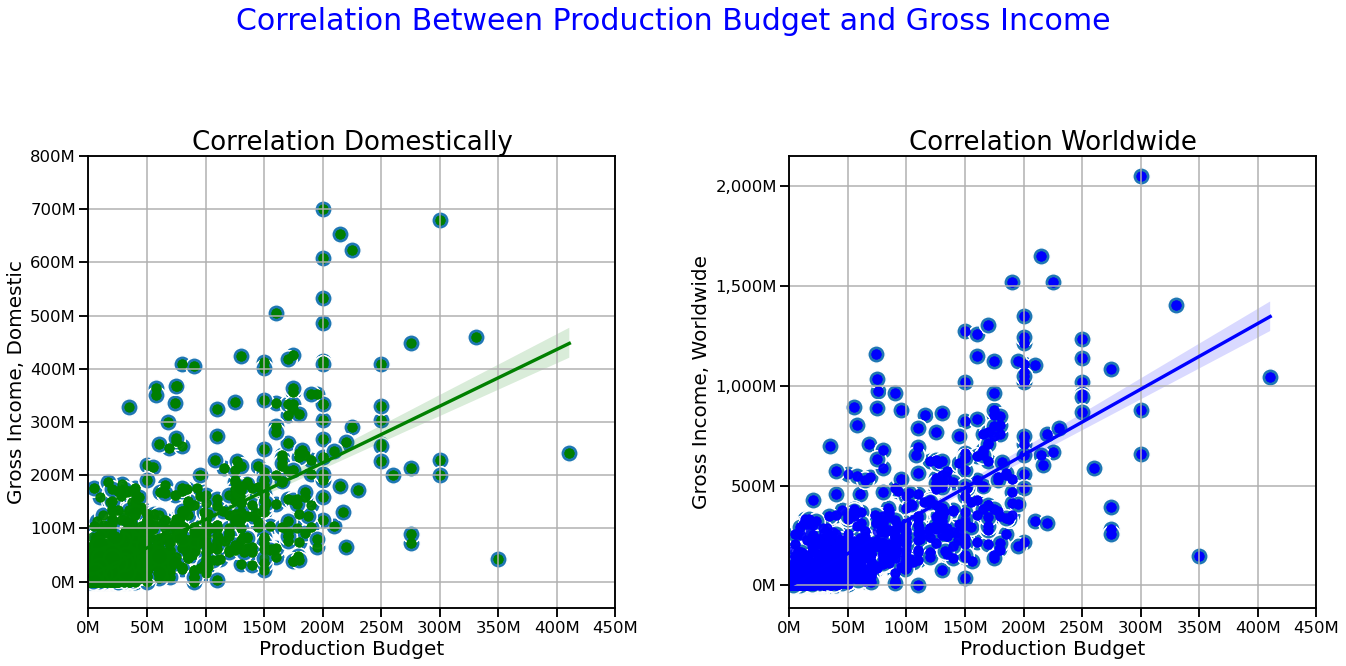

In [97]:
#Visualizing the correlation for movies of all genres
fig, axes = plt.subplots(figsize=(20,10), ncols=2)
sns.scatterplot(data=df_budget_gross_income, x="budget", y="domestic_gross", s=300,
               ax=axes[0])
sns.scatterplot(data=df_budget_gross_income, x="budget", y="worldwide_gross", s=300,
               ax=axes[1])
g1=sns.regplot(data=df_budget_gross_income, x="budget", y="domestic_gross", color="Green", ax=axes[0])
g2=sns.regplot(data=df_budget_gross_income, x="budget", y="worldwide_gross", color="Blue", ax=axes[1])

axes[0].set_title("Correlation Domestically", fontsize=26);
axes[0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0].set_xlabel('Production Budget', fontsize=20)
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_yticks()/1000000]
axes[0].set_xticklabels(xlabels)
axes[0].set_yticklabels(ylabels)
axes[0].set_ylim(-50000000, 800000000)
axes[0].set_xlim(0, 450000000)
axes[0].grid()

axes[1].set_title("Correlation Worldwide", fontsize=26);
axes[1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1].set_xlabel('Production Budget', fontsize=20)
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_yticks()/1000000]
axes[1].set_xticklabels(xlabels)
axes[1].set_yticklabels(ylabels)
axes[1].set_xlim(0, 450000000)
#axes[1].set_ylim(-50000000, 2000000000)
axes[1].grid();

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout(pad=3)

<div class="alert alert-block alert-success">
    The correlation between Gross Income and budget can be seen in the plots above. However, it might be too congested because the movies of different genres are clumped together. It is logical to assume that movies of different genres might have different budget needs. For example, horror movies are cheaper to produce, while sci-fi or action movies are pretty expensive.
    It would be an excellent exercise to put side by side the correlations within all three genres that performed the best on their ROI (Horror, Mystery, Thriller), both domestically and abroad.
    </div>

In [98]:
#Generating a Dataframe with financial data for three genres
q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres in ('Horror', 'Mystery','Thriller')"""
df_budget_gross_income_three_genres=table_query(q)

In [99]:
#Generating three separate DataFrames per genre
q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres='Horror'"""
df_budget_gross_income_horror=table_query(q)

q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres='Mystery'"""
df_budget_gross_income_mystery=table_query(q)

q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres='Thriller'"""
df_budget_gross_income_thriller=table_query(q)

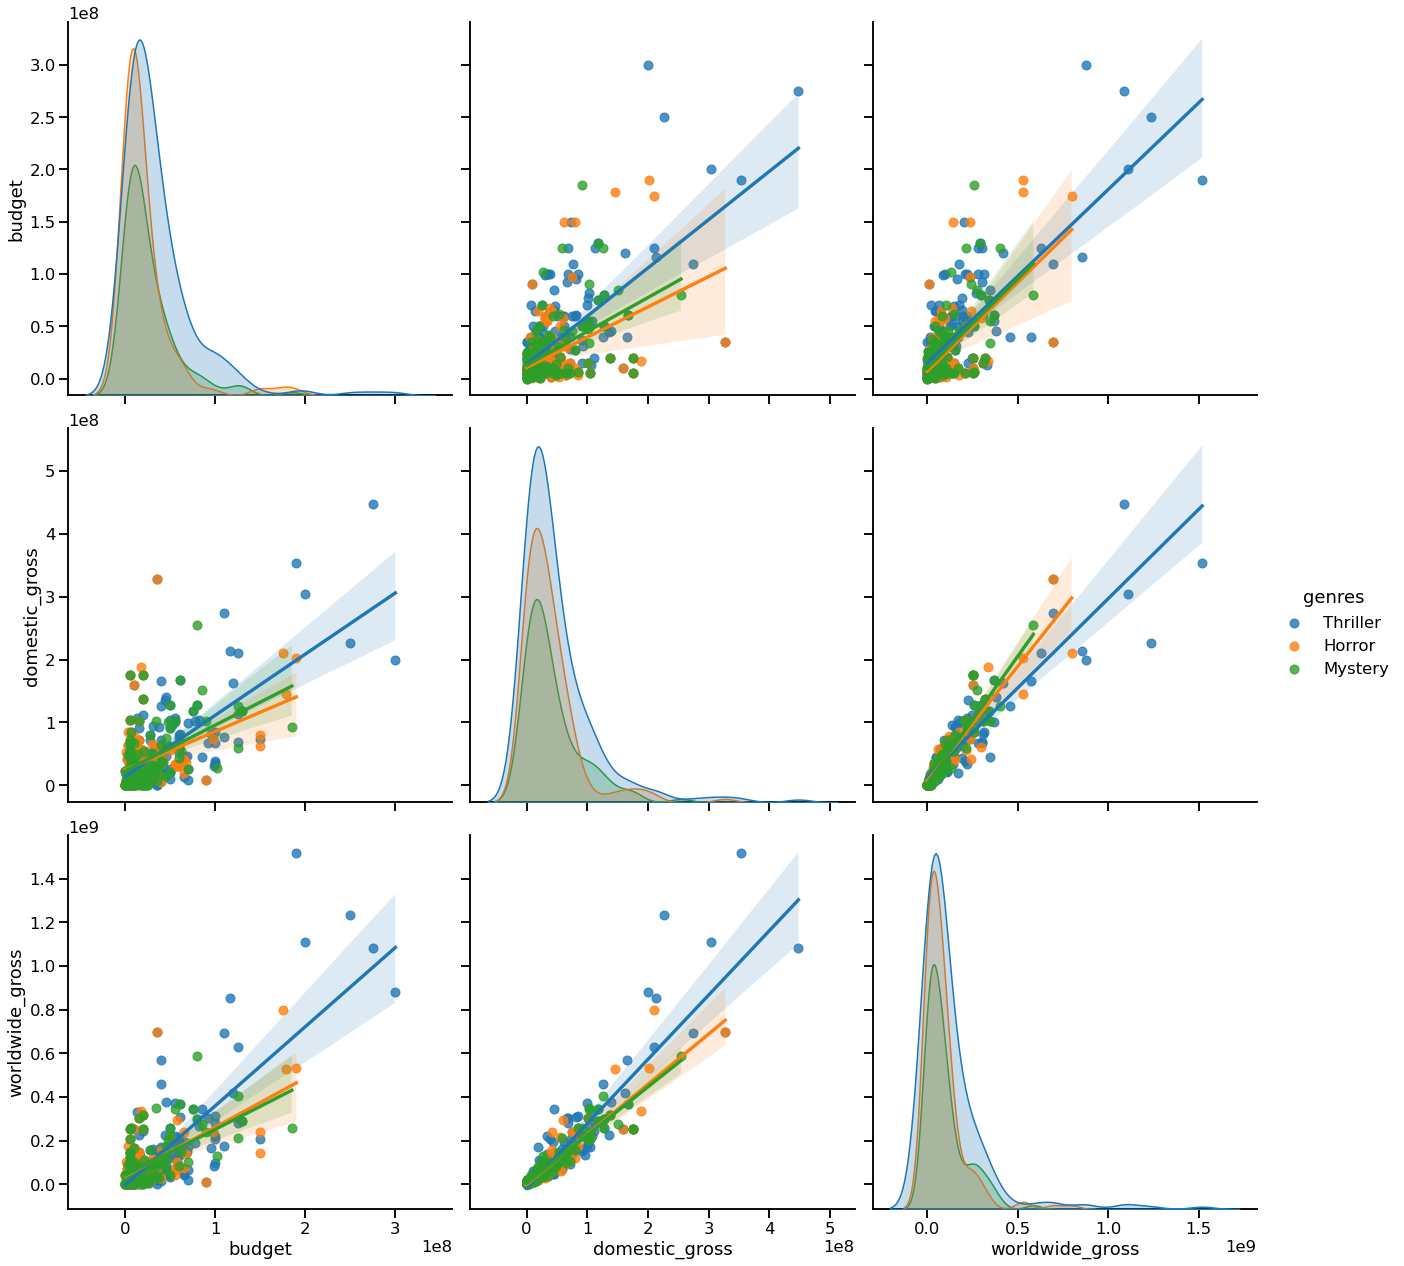

In [100]:
#To visualize the correlation between domestic/worldwide pairplot is being used
sns.pairplot(data=df_budget_gross_income_three_genres, kind='reg', hue='genres', height=6)

<div class="alert alert-block alert-success">The plots above clearly conclude that there are three separate correlations between gross income and production budget for movies in Horror, Mystery, and Thriller genres.
    </div>

<div class="alert alert-block alert-info">Based on the analysis above, it would be logical to visualize all three genres' correlations to present them to the customer.
    </div>

<ipython-input-101-47ae24401000>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(xlabels)
<ipython-input-101-47ae24401000>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels)
<ipython-input-101-47ae24401000>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(xlabels)
<ipython-input-101-47ae24401000>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_yticklabels(ylabels)
<ipython-input-101-47ae24401000>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(xlabels)
<ipython-input-101-47ae24401000>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_yticklabels(ylabels)
<ipython-input-101-47ae24401000>:53: UserWarning: FixedFormatter should only be used together with FixedLo

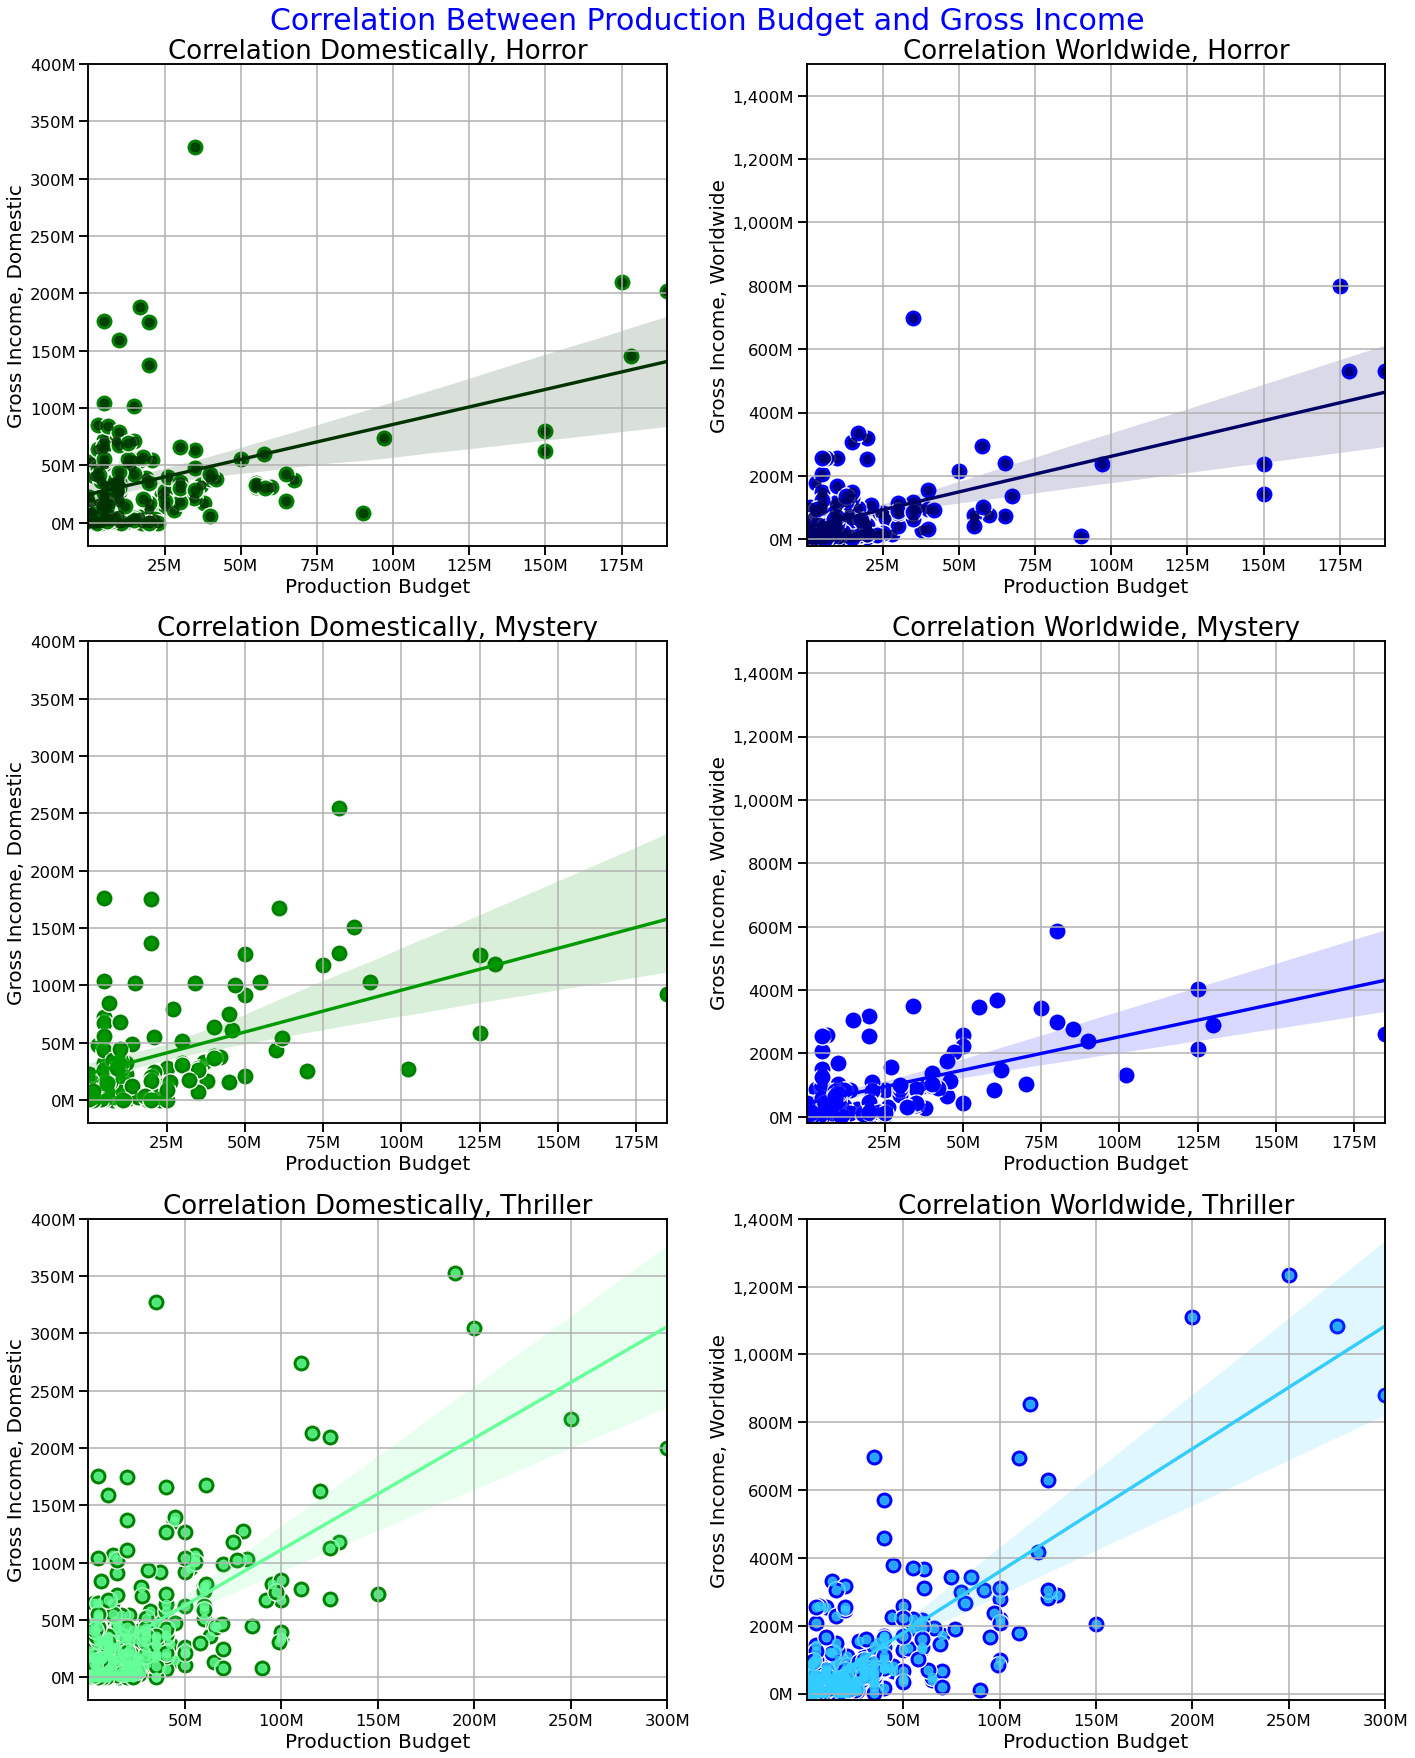

In [101]:
fig, axes = plt.subplots(figsize=(20,25), ncols=2, nrows=3)
#sns.set_style('whitegrid')
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[0,0])
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[0,1])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[1,0])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[1,1])
sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[2,0])
sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[2,1])

g1=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", color="#003300", ax=axes[0,0]);
g2=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", color="#000066", ax=axes[0,1]);
g3=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", color="#009900", ax=axes[1,0]);
g4=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", color="#0000ff", ax=axes[1,1]);
g5=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", color="#66ff99", ax=axes[2,0]);
g6=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", color="#33ccff", ax=axes[2,1]);                

axes[0,0].set_title("Correlation Domestically, Horror", fontsize=26);
axes[0,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0,0].set_xlabel('Production Budget', fontsize=20)
axes[0,0].set_ylim((-20000000.0), (400000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_yticks()/1000000]
axes[0,0].set_xticklabels(xlabels)
axes[0,0].set_yticklabels(ylabels)
axes[0,0].grid()

axes[0,1].set_title("Correlation Worldwide, Horror", fontsize=26);
axes[0,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[0,1].set_xlabel('Production Budget', fontsize=20)
axes[0,1].set_ylim((-20000000.0), (1500000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_yticks()/1000000]
axes[0,1].set_xticklabels(xlabels)
axes[0,1].set_yticklabels(ylabels)
axes[0,1].grid()

axes[1,0].set_title("Correlation Domestically, Mystery", fontsize=26);
axes[1,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[1,0].set_xlabel('Production Budget', fontsize=20)
axes[1,0].set_ylim((-20000000.0), (400000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_yticks()/1000000]
axes[1,0].set_xticklabels(xlabels)
axes[1,0].set_yticklabels(ylabels)
axes[1,0].grid()

axes[1,1].set_title("Correlation Worldwide, Mystery", fontsize=26);
axes[1,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1,1].set_xlabel('Production Budget', fontsize=20)
axes[1,1].set_ylim((-20000000.0), (1500000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_yticks()/1000000]
axes[1,1].set_xticklabels(xlabels)
axes[1,1].set_yticklabels(ylabels)
axes[1,1].grid()
                
axes[2,0].set_title("Correlation Domestically, Thriller", fontsize=26);
axes[2,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[2,0].set_xlabel('Production Budget', fontsize=20)
axes[2,0].set_ylim((-20000000.0), (400000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_yticks()/1000000]
axes[2,0].set_xticklabels(xlabels)
axes[2,0].set_yticklabels(ylabels)
axes[2,0].grid()

axes[2,1].set_title("Correlation Worldwide, Thriller", fontsize=26);
axes[2,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[2,1].set_xlabel('Production Budget', fontsize=20)
axes[2,1].set_ylim((-20000000.0), (1400000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_yticks()/1000000]
axes[2,1].set_xticklabels(xlabels)
axes[2,1].set_yticklabels(ylabels)
axes[2,1].grid()

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout()

<div class="alert alert-block alert-info">Visual investigation of the plots above suggests a closer examination of the lower quadrant data.
    </div>

<ipython-input-102-46ccc466aada>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(xlabels)
<ipython-input-102-46ccc466aada>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels)
<ipython-input-102-46ccc466aada>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(xlabels)
<ipython-input-102-46ccc466aada>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_yticklabels(ylabels)
<ipython-input-102-46ccc466aada>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(xlabels)
<ipython-input-102-46ccc466aada>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_yticklabels(ylabels)
<ipython-input-102-46ccc466aada>:54: UserWarning: FixedFormatter should only be used together with FixedLo

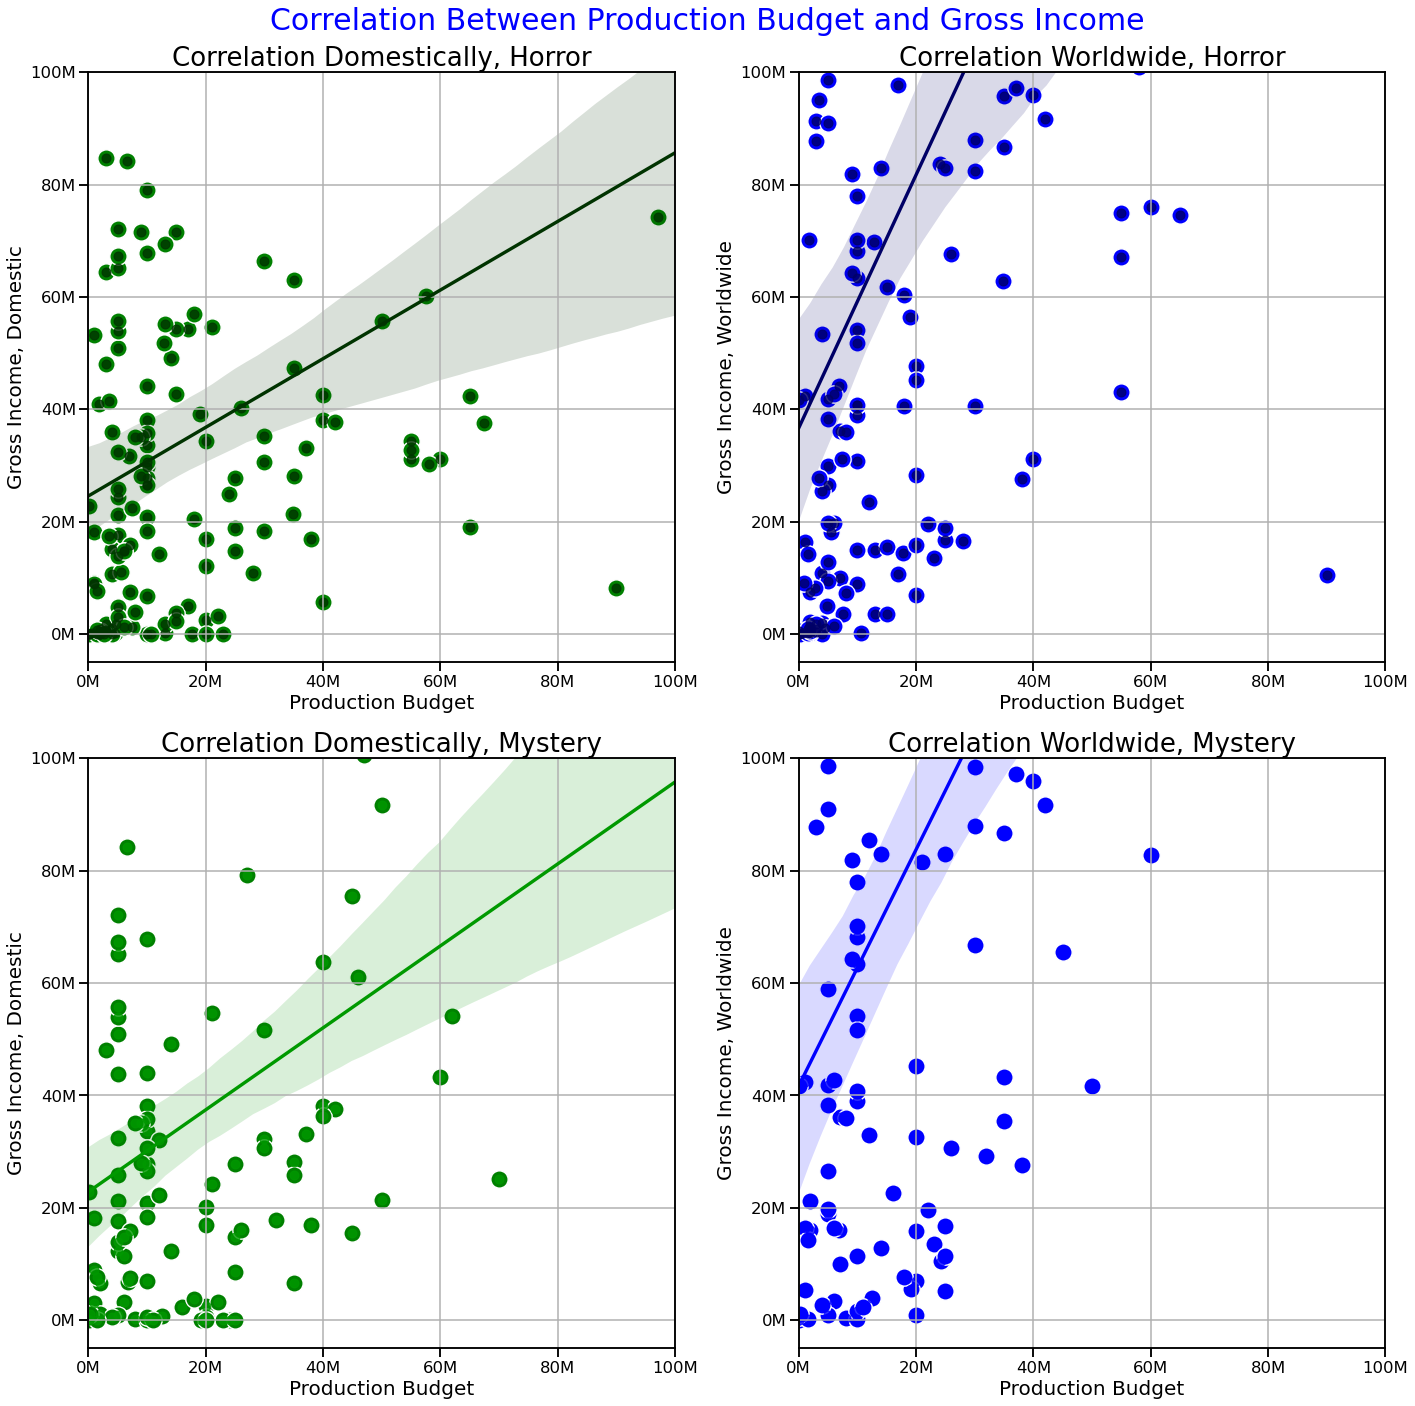

In [102]:
#Ploting Horror and Mystery movies data in the low quadrant plots above, zooming into the previous plots and ploting withing comarable x, y areas
fig, axes = plt.subplots(figsize=(20,20), ncols=2, nrows=2)
#sns.set_style('whitegrid')
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[0,0])
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[0,1])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[1,0])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[1,1])

g1=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", color="#003300", ax=axes[0,0]);
g2=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", color="#000066", ax=axes[0,1]);
g3=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", color="#009900", ax=axes[1,0]);
g4=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", color="#0000ff", ax=axes[1,1]);

axes[0,0].set_title("Correlation Domestically, Horror", fontsize=26);
axes[0,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0,0].set_xlabel('Production Budget', fontsize=20)
axes[0,0].set_ylim((-5000000.0), (100000000.0))
axes[0,0].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_yticks()/1000000]
axes[0,0].set_xticklabels(xlabels)
axes[0,0].set_yticklabels(ylabels)
axes[0,0].grid()

axes[0,1].set_title("Correlation Worldwide, Horror", fontsize=26);
axes[0,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[0,1].set_xlabel('Production Budget', fontsize=20)
axes[0,1].set_ylim((-5000000.0), (100000000.0))
axes[0,1].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_yticks()/1000000]
axes[0,1].set_xticklabels(xlabels)
axes[0,1].set_yticklabels(ylabels)
axes[0,1].grid()

axes[1,0].set_title("Correlation Domestically, Mystery", fontsize=26);
axes[1,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[1,0].set_xlabel('Production Budget', fontsize=20)
axes[1,0].set_ylim((-5000000.0), (100000000.0))
axes[1,0].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_yticks()/1000000]
axes[1,0].set_xticklabels(xlabels)
axes[1,0].set_yticklabels(ylabels)
axes[1,0].grid()

axes[1,1].set_title("Correlation Worldwide, Mystery", fontsize=26);
axes[1,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1,1].set_xlabel('Production Budget', fontsize=20)
axes[1,1].set_ylim((-5000000.0), (100000000.0))
axes[1,1].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_yticks()/1000000]
axes[1,1].set_xticklabels(xlabels)
axes[1,1].set_yticklabels(ylabels)
axes[1,1].grid()
                

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout()

<div class="alert alert-block alert-success">Visual investigation of the plots above suggests that in the Domestic market, one can expect close to 2 coefficient in investment with budgets of 20 million and lower for movies in Horror and Mystery genres<br>
However, as the budget grows, the return falls.
    </div>

<ipython-input-103-cec999eb1eb4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels)
<ipython-input-103-cec999eb1eb4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(ylabels)
<ipython-input-103-cec999eb1eb4>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels)
<ipython-input-103-cec999eb1eb4>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(ylabels)


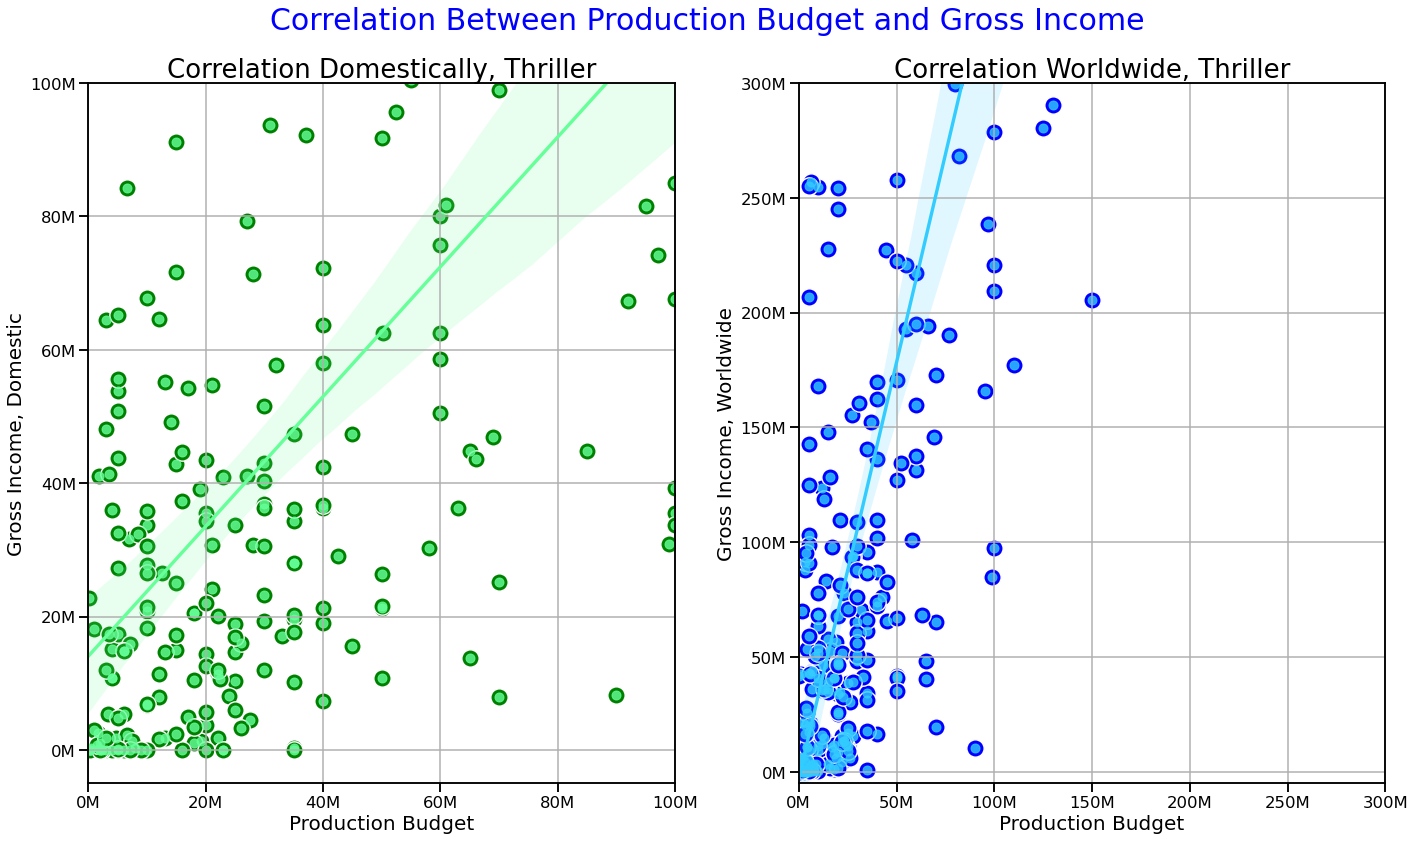

In [103]:
fig, axes = plt.subplots(figsize=(20,12), ncols=2)
#sns.set_style('whitegrid')

sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[0])
sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[1])


g5=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", color="#66ff99", ax=axes[0]);
g6=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", color="#33ccff", ax=axes[1]);                

                
axes[0].set_title("Correlation Domestically, Thriller", fontsize=26);
axes[0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0].set_xlabel('Production Budget', fontsize=20)
axes[0].set_ylim((-5000000.0), (100000000.0))
axes[0].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_yticks()/1000000]
axes[0].set_xticklabels(xlabels)
axes[0].set_yticklabels(ylabels)
axes[0].grid()

axes[1].set_title("Correlation Worldwide, Thriller", fontsize=26);
axes[1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1].set_xlabel('Production Budget', fontsize=20)
axes[1].set_ylim((-5000000.0), (300000000.0))
axes[1].set_xlim((0), (300000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_yticks()/1000000]
axes[1].set_xticklabels(xlabels)
axes[1].set_yticklabels(ylabels)
axes[1].grid()

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout()

<div class="alert alert-block alert-success">Visual investigation of the plots above suggests that while Thriller movies do not perform quite as well as horror and mystery movies domestically, the regression model suggests that 20 million investment would generate slightly above 30 million in gross income (a coefficient of return is about 1.75). Internationally, thriller movies tend to do much better, and an estimate of a coefficient of return is about 3.5. If they choose to produce a Thriller genre movie, the customer is recommended to release it to the foreign markets to maximize the return.<br>
    The conclusion is that thriller movie budgets tend to be higher than those of Horror and Mystery movies. However, the overall profit for Thriller movies tends to be higher. The production of **several** Horror/Mystery movies might cost the same as the production of one Thriller movie to generate the same amount of gross profit. However, several movies' production versus one might be a smart move because it increases the probability of success overall (not putting all your eggs in one basket approach.
    </div>

In [104]:
conn.commit()

In [105]:
cur.close()

## Evaluation
The business problem solution should maximize the return over investment value along with minimizing the risks.

***
**The provided analysis investigates:**
* How well various studios perform in terms of their ROI both domestically and worldwide
* How timing of a release of a movie influences its' profitability
* How a genre of a movie influences its' profitability
* If a movie budget plays a significant role in the amount of its' gross income and if movies of different genres have different correlations between their budgets and gross income generated.
***

## Conclusions

***
**The customer is advised:**
* To either partner with Universal Studios, Paramount Pictures, The Weinstein Company, and Lions Gate Films Corporation studios (in that order) or invest in investigating their business practices and replicating them in their business.
* To carefully plan the timing of releasing their movies because Return on Investment tends to be higher in the time periods when fewer movies are available to the viewers. The only exception is the month of July, an outlier among other months of a year. It seems that no matter how many movies are in the theaters, it will be more profitable than in other months of a year.
* To invest in the three most profitable genres in terms of Return on Investment, Horror, Mystery, and Thriller (in that order), both domestically and abroad. Their production budgets tend to be lower than movies in other genres, but the ratio between their gross incomes to the production costs is higher. In other words, it is more profitable to make many movies in these genres than just one movie in a genre with higher production costs and higher one-movie gross income. These tactics have the additional benefit of minimizing the risk of investment. 
***

**Additional analysis suggested:**
* Update data available for analysis by either creating APIs with the sources or webscraping their sites
* Investigate the effect of a choice of directors/writers on the profitability of a movie using additional tables in the database
* Use Rotten Tomatoes tables to analyze the correlations between the profitability of a movie and its' critics rating and viewers' rating
* Replicate the analysis of this project using Rotten Tomatoes tables to confirm the findings